# Thesis Plotter

## Imports and Methods

In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.kinematic_cuts as cuts
import my_library.constants as constants
import my_library.gluex_style as gxs
import numpy as np
import pandas as pd
import os

Welcome to JupyROOT 6.24/04


In [2]:
def title_hists(hist: list, xtitle, ytitle, yoffset=None):
    for hist in hist:
        hist.GetXaxis().SetTitle(xtitle)
        hist.GetYaxis().SetTitle(ytitle)
        if yoffset:
            hist.GetYaxis().SetTitleOffset(yoffset)

    

# Make Plots for My Thesis 

## Luminosity table in latex form

In [3]:
for e in range(7, 12):
    e_lumi = tools.get_luminosity_gluex_1(e-0.5, e+0.5)
    print("{} & {:0.2f} \\\ \hline".format(e, e_lumi))

7 & 42.73 \\ \hline
8 & 141.07 \\ \hline
9 & 112.30 \\ \hline
10 & 70.81 \\ \hline
11 & 60.14 \\ \hline


## $\Delta t$ table in latex form

In [4]:
for tbin in range(1, 8):
    t_low, t_high = constants.T_CUT_DICT[tbin]
    t_bin_middle = (t_low + t_high) / 2
    t_bin_width = t_high - t_low
    print('{:0.3f} & {:0.3f} \\\ \hline'.format(t_bin_middle, t_bin_width))

0.150 & 0.100 \\ \hline
0.250 & 0.100 \\ \hline
0.350 & 0.100 \\ \hline
0.525 & 0.250 \\ \hline
0.775 & 0.250 \\ \hline
1.150 & 0.500 \\ \hline
1.650 & 0.500 \\ \hline


## PID Timing Table

In [5]:
timing_dict = {
    '$pi^+$': (1.0, 0.5, 2.0, 2.5),
    '$pi^-$': (1.0, 0.5, 2.0, 2.5),
    '$K^+$': (0.75, 0.3, 2.5, 2.5),
    '$K^-$': (0.75, 0.3, 2.5, 2.5),
    '$p$': (1.0, 0.6, 2.0, 2.5)
}

for particle in timing_dict:
    timing = timing_dict[particle]
    print('{} & $\pm {:0.2f}$ & $\pm {:0.2f}$ & $\pm {:0.2f}$ & $\pm {:0.2f}$ \\\ \hline'.format(particle, *timing))

$pi^+$ & $\pm 1.00$ & $\pm 0.50$ & $\pm 2.00$ & $\pm 2.50$ \\ \hline
$pi^-$ & $\pm 1.00$ & $\pm 0.50$ & $\pm 2.00$ & $\pm 2.50$ \\ \hline
$K^+$ & $\pm 0.75$ & $\pm 0.30$ & $\pm 2.50$ & $\pm 2.50$ \\ \hline
$K^-$ & $\pm 0.75$ & $\pm 0.30$ & $\pm 2.50$ & $\pm 2.50$ \\ \hline
$p$ & $\pm 1.00$ & $\pm 0.60$ & $\pm 2.00$ & $\pm 2.50$ \\ \hline


## Fit Variation Max Impact Table

In [6]:
var_names = {'pol1': "1st-Order Polynomial", 'exppol2': "Exponential", "wideboth": "Wider Fit Range"}
channel_names = {'pipkmks': '$\pi^+K^-K_s$', 'pimkpks': '$\pi^-K^+K_s$' }

fit_sys_df = pd.read_csv('/work/halld/home/viducic/systematic_errors/max_changes.csv')
fit_sys_grouped = fit_sys_df.groupby('channel')
for channel, group in fit_sys_grouped:
    print(f'{channel_names[channel]} & {group["max_percent_change"].mean():0.3f} & {group["max_percent_change"].std():0.3f} \\\ \hline')
    table_str = '$E_\gamma & -t & Variation & |(Varied - Nominal)|/Nominal \\\ \hline'
    print(table_str)
    for index, row in group.iterrows():
        t_middle = constants.T_CUT_DICT[row['t']][0] + constants.T_WIDTH_DICT[row['t']] / 2
        table_str = '{} & {:0.3f} & {} & {:0.3f} \\\ \hline'.format(row['e'], t_middle, var_names[row['max_var']], np.abs(row['max_percent_change']))
        print(table_str)
    print('\n')

$\pi^-K^+K_s$ & -0.029 & 0.035 \\ \hline
$E_\gamma & -t & Variation & |(Varied - Nominal)|/Nominal \\ \hline
8 & 0.150 & 1st-Order Polynomial & 0.021 \\ \hline
8 & 0.250 & Exponential & 0.027 \\ \hline
8 & 0.350 & 1st-Order Polynomial & 0.015 \\ \hline
8 & 0.525 & Exponential & 0.039 \\ \hline
8 & 0.775 & Exponential & 0.016 \\ \hline
8 & 1.150 & Exponential & 0.018 \\ \hline
8 & 1.650 & Exponential & 0.024 \\ \hline
9 & 0.150 & 1st-Order Polynomial & 0.041 \\ \hline
9 & 0.250 & Exponential & 0.016 \\ \hline
9 & 0.350 & Exponential & 0.023 \\ \hline
9 & 0.525 & Exponential & 0.019 \\ \hline
9 & 0.775 & Exponential & 0.018 \\ \hline
9 & 1.150 & 1st-Order Polynomial & 0.036 \\ \hline
9 & 1.650 & 1st-Order Polynomial & 0.032 \\ \hline
10 & 0.150 & 1st-Order Polynomial & 0.086 \\ \hline
10 & 0.250 & Exponential & 0.032 \\ \hline
10 & 0.350 & Exponential & 0.030 \\ \hline
10 & 0.525 & 1st-Order Polynomial & 0.016 \\ \hline
10 & 0.775 & Exponential & 0.027 \\ \hline
10 & 1.150 & 1st-Order Po

In [7]:
ROOT.EnableImplicitMT()
os.nice(18)

18

In [8]:
df_pipkmks = tools.get_dataframe('pipkmks', 'gluex1', 'data', filtered=False)
df_pimkpks = tools.get_dataframe('pimkpks', 'gluex1', 'data', filtered=False)

df_pipkmks = df_pipkmks.Define('kmpip_m2', 'kmpip_m * kmpip_m').Define('kspip_m2', 'kspip_m * kspip_m')
df_pimkpks = df_pimkpks.Define('kppim_m2', 'kppim_m * kppim_m').Define('kspim_m2', 'kspim_m * kspim_m')

## Kinfit $\chi^2/ndf$ and Kinfit Confidence Level

In [9]:
kcl_bins, kcl_xlow, kcl_xhigh = 100, 1e-12, 1e-3
x2ndf_bins, x2ndf_xlow, x2ndf_xhigh = 100, 0, 10

hist_kcl_pipkmks = df_pipkmks.Histo1D(('h_kcl_pipkmks', 'KCL for #pi^{+}K^{-}K_{S}^{0}', kcl_bins, kcl_xlow, kcl_xhigh), 'kinfit_cl')
hist_kcl_pimkpks = df_pimkpks.Histo1D(('h_kcl_pimkpks', 'KCL for #pi^{-}K^{+}K_{S}^{0}', kcl_bins, kcl_xlow, kcl_xhigh), 'kinfit_cl')

hist_kcl_pipkmks_cut = df_pipkmks.Filter(cuts.KINFIT_CL_CUT).Histo1D(('h_kcl_pipkmks_cut', 'KCL for #pi^{+}K^{-}K_{S}^{0}', kcl_bins, kcl_xlow, kcl_xhigh), 'kinfit_cl')
hist_kcl_pimkpks_cut = df_pimkpks.Filter(cuts.KINFIT_CL_CUT).Histo1D(('h_kcl_pimkpks_cut', 'KCL for #pi^{-}K^{+}K_{S}^{0}', kcl_bins, kcl_xlow, kcl_xhigh), 'kinfit_cl')

hist_x2ndf_pipkmks = df_pipkmks.Histo1D(('h_x2ndf_pipkmks', 'x2ndf for #pi^{+}K^{-}K_{S}^{0}', x2ndf_bins, x2ndf_xlow, x2ndf_xhigh), "chi2ndf")
hist_x2ndf_pimkpks = df_pimkpks.Histo1D(('h_x2ndf_pimkpks', 'x2ndf for #pi^{-}K^{+}K_{S}^{0}', x2ndf_bins, x2ndf_xlow, x2ndf_xhigh), "chi2ndf")


In [10]:
df_pipkmks = df_pipkmks.Filter(cuts.KINFIT_CL_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.KINFIT_CL_CUT)

## $M^{2}_{x}(pKK\pi)$

In [11]:
mx2_all_bins, mx2_all_xlow, mx2_all_xhigh = 1000, -0.1, 0.1
hist_mx2all_pipkmks = df_pipkmks.Histo1D(('mx2_all_pipkmks', 'mx2_all_pipkmks', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppipkmks')
hist_mx2all_pimkpks = df_pimkpks.Histo1D(('mx2_all_pimkpks', 'mx2_all_pimkpks', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppimkpks')

hist_mx2all_pipkmks_cut = df_pipkmks.Filter(cuts.MX2_PPIPKMKS_CUT).Histo1D(('mx2_all_pipkmks_cut', 'mx2_all_pipkmks_cut', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppipkmks')
hist_mx2all_pimkpks_cut = df_pimkpks.Filter(cuts.MX2_PPIMKPKS_CUT).Histo1D(('mx2_all_pimkpks_cut', 'mx2_all_pimkpks_cut', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppimkpks')

In [12]:
df_pipkmks = df_pipkmks.Filter(cuts.MX2_PPIPKMKS_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.MX2_PPIMKPKS_CUT)


## $\vec{p}(p')$

In [13]:
pp_bins, pp_xlow, pp_xhigh = 200, 0, 1.9
hist_trange_pipkmks = df_pipkmks.Histo1D(('trange_pipkmks', 'trange_pipkmks', pp_bins, pp_xlow, pp_xhigh ), 'mand_t')
hist_trange_pimkpks = df_pimkpks.Histo1D(('trange_pimkpks', 'trange_pimkpks', pp_bins, pp_xlow, pp_xhigh ), 'mand_t')
hist_trange_pipkmks_cut = df_pipkmks.Filter(cuts.P_P_CUT).Histo1D(('trange_pipkmks_cut', 'trange_pipkmks_cut', pp_bins, pp_xlow, pp_xhigh ), 'mand_t')
hist_trange_pimkpks_cut = df_pimkpks.Filter(cuts.P_P_CUT).Histo1D(('trange_pimkpks_cut', 'trange_pimkpks_cut', pp_bins, pp_xlow, pp_xhigh ), 'mand_t')

In [14]:
df_pipkmks = df_pipkmks.Filter(cuts.P_P_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.P_P_CUT)

## $K_s$ Pathlength $\Delta r/\sigma_r$

In [15]:
ks_bins, ks_xlow, ks_xhigh = 1000, 0.35, 0.65

hist_ks_pipkmks = df_pipkmks.Histo1D(('ks_pipkmks', 'ks_pipkmks', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')
hist_ks_pimkpks = df_pimkpks.Histo1D(('ks_pimkpks', 'ks_pimkpks', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')

hist_ks_pipkmks_cut = df_pipkmks.Filter(cuts.KS_PATHLENGTH_CUT).Histo1D(('ks_pipkmks_cut', 'ks_pipkmks_cut', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')
hist_ks_pimkpks_cut = df_pimkpks.Filter(cuts.KS_PATHLENGTH_CUT).Histo1D(('ks_pimkpks_cut', 'ks_pimkpks_cut', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')

## $K_s$ Mass Cut

In [16]:
hist_ks_pipkmks_cut_2 = df_pipkmks.Filter(cuts.KS_PATHLENGTH_CUT).Filter(cuts.KS_MASS_CUT).Histo1D(('ks_pipkmks_cut_2', 'ks_pipkmks_cut_2', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')
hist_ks_pimkpks_cut_2 = df_pimkpks.Filter(cuts.KS_PATHLENGTH_CUT).Filter(cuts.KS_MASS_CUT).Histo1D(('ks_pimkpks_cut_2', 'ks_pimkpks_cut_2', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')

## $\Delta$ and $N^*$

In [17]:
df_pipkmks = df_pipkmks.Filter(cuts.KS_PATHLENGTH_CUT).Filter(cuts.KS_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.KS_PATHLENGTH_CUT).Filter(cuts.KS_MASS_CUT)

In [18]:
ppi_bins, ppi_xlow, ppi_xhigh = 200, 1.0, 3.0
hist_ppi_pipkmks = df_pipkmks.Histo1D(('ppi_pipkmks', 'ppi_pipkmks', ppi_bins, ppi_xlow, ppi_xhigh ), 'ppip_m')
hist_ppi_pimkpks = df_pimkpks.Histo1D(('ppi_pimkpks', 'ppi_pimkpks', ppi_bins, ppi_xlow, ppi_xhigh ), 'ppim_m')
hist_ppi_pipkmks_cut = df_pipkmks.Filter(cuts.PPIP_MASS_CUT).Histo1D(('ppi_pipkmks_cut', 'ppi_pipkmks_cut', ppi_bins, ppi_xlow, ppi_xhigh ), 'ppip_m')
hist_ppi_pimkpks_cut = df_pimkpks.Filter(cuts.PPIM_MASS_CUT).Histo1D(('ppi_pimkpks_cut', 'ppi_pimkpks_cut', ppi_bins, ppi_xlow, ppi_xhigh ), 'ppim_m')

## $\Lambda/\Sigma$

In [19]:
df_pipkmks = df_pipkmks.Filter(cuts.PPIP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.PPIM_MASS_CUT)

In [20]:
kp_bins, kp_xlow, kp_xhigh = 100, 1.2, 3.5
hist_pks_pipkmks = df_pipkmks.Histo1D(('pks_pipkmks', 'pks_pipkmks', kp_bins, kp_xlow, kp_xhigh ), 'ksp_m')
hist_pks_pimkpks = df_pimkpks.Histo1D(('pks_pimkpks', 'pks_pimkpks', kp_bins, kp_xlow, kp_xhigh ), 'ksp_m')
hist_pks_pipkmks_cut = df_pipkmks.Filter(cuts.KSP_MASS_CUT).Histo1D(('pks_pipkmks_cut', 'pks_pipkmks_cut', kp_bins, kp_xlow, kp_xhigh ), 'ksp_m')
hist_pks_pimkpks_cut = df_pimkpks.Filter(cuts.KSP_MASS_CUT).Histo1D(('pks_pimkpks_cut', 'pks_pimkpks_cut', kp_bins, kp_xlow, kp_xhigh ), 'ksp_m')

hist_pk_pipkmks = df_pipkmks.Histo1D(('pk_pipkmks', 'pk_pipkmks', kp_bins, kp_xlow, kp_xhigh ), 'kmp_m')
hist_pk_pimkpks = df_pimkpks.Histo1D(('pk_pimkpks', 'pk_pimkpks', kp_bins, kp_xlow, kp_xhigh ), 'kpp_m')
hist_pk_pipkmks_cut = df_pipkmks.Filter(cuts.KMP_MASS_CUT).Histo1D(('pk_pipkmks_cut', 'pk_pipkmks_cut', kp_bins, kp_xlow, kp_xhigh ), 'kmp_m')
hist_pk_pimkpks_cut = df_pimkpks.Filter(cuts.KPP_MASS_CUT).Histo1D(('pk_pimkpks_cut', 'pk_pimkpks_cut', kp_bins, kp_xlow, kp_xhigh ), 'kpp_m')

## $KK\pi$ After Kinematics Cuts and Before $K^*$ Selection 

In [21]:
df_pipkmks = df_pipkmks.Filter(cuts.KSP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.KSP_MASS_CUT)

df_pipkmks = df_pipkmks.Filter(cuts.KMP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.KPP_MASS_CUT)

In [22]:
kkpi_bins, kkpi_xlow, kkpi_xhigh = 70, 1.1, 1.8

hist_kkpi_no_kstar_pipkmks = df_pipkmks.Histo1D(('kkpi_no_kstar_pipkmks', 'kkpi_no_kstar_pipkmks', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pipkmks_m')
hist_kkpi_no_kstar_pimkpks = df_pimkpks.Histo1D(('kkpi_no_kstar_pimkpks', 'kkpi_no_kstar_pimkpks', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pimkpks_m')

## $K\pi$ Dalitz Plots

In [23]:
n_bins, kpi_low, kpi_high = 100, 0.2, 1.2

hist_kstar_dalitz_pipkmks_1285 = df_pipkmks.Filter('(pipkmks_m >= 1.22) && (pipkmks_m < 1.34)').Histo2D(('kstar_dalitz_pipkmks_1285', 'Dalitz Plot for M^2(#K_{s}\pi^{+}) vs M^2(#K^{-}\pi^{+})', n_bins, kpi_low, kpi_high, n_bins, kpi_low, kpi_high), 'kspip_m2', 'kmpip_m2')
hist_kstar_dalitz_pipkmks_1400 = df_pipkmks.Filter('(pipkmks_m >= 1.34) && (pipkmks_m < 1.5)').Histo2D(('kstar_dalitz_pipkmks_1400', 'Dalitz Plot for M^2(#K_{s}\pi^{+}) vs M^2(#K^{-}\pi^{+})', n_bins, kpi_low, kpi_high, n_bins, kpi_low, kpi_high), 'kspip_m2', 'kmpip_m2')
hist_kstar_dalitz_pipkmks_1500 = df_pipkmks.Filter('(pipkmks_m >= 1.5)').Histo2D(('kstar_dalitz_pipkmks_1500', 'Dalitz Plot for M^2(#K_{s}\pi^{+}) vs M^2(#K^{-}\pi^{+})', n_bins, kpi_low, kpi_high, n_bins, kpi_low, kpi_high), 'kspip_m2', 'kmpip_m2')
hist_kstar_dalitz_pimkpks_1285 = df_pimkpks.Filter('(pimkpks_m >= 1.22) && (pimkpks_m < 1.34)').Histo2D(('kstar_dalitz_pimkpks_1285', 'Dalitz Plot for M^2(#K_{s}\pi^{-}) vs M^2(#K^{+}\pi^{-})', n_bins, kpi_low, kpi_high, n_bins, kpi_low, kpi_high), 'kspim_m2', 'kppim_m2')
hist_kstar_dalitz_pimkpks_1400 = df_pimkpks.Filter('(pimkpks_m >= 1.34) && (pimkpks_m < 1.5)').Histo2D(('kstar_dalitz_pimkpks_1400', 'Dalitz Plot for M^2(#K_{s}\pi^{-}) vs M^2(#K^{+}\pi^{-})', n_bins, kpi_low, kpi_high, n_bins, kpi_low, kpi_high), 'kspim_m2', 'kppim_m2')
hist_kstar_dalitz_pimkpks_1500 = df_pimkpks.Filter('(pimkpks_m >= 1.5)').Histo2D(('kstar_dalitz_pimkpks_1500', 'Dalitz Plot for M^2(#K_{s}\pi^{-}) vs M^2(#K^{+}\pi^{-})', n_bins, kpi_low, kpi_high, n_bins, kpi_low, kpi_high), 'kspim_m2', 'kppim_m2')

## $K^*$ Rejection

In [24]:
hist_kkpi_kstar_rejected_pipkmks = df_pipkmks.Filter(cuts.KSTAR_ALL_CUT_PIPKMKS).Histo1D(('kkpi_kstar_rejected_pipkmks', 'kkpi_kstar_rejected_pipkmks', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pipkmks_m')
hist_kkpi_kstar_rejected_pimkpks = df_pimkpks.Filter(cuts.KSTAR_ALL_CUT_PIMKPKS).Histo1D(('kkpi_kstar_rejected_pimkpks', 'kkpi_kstar_rejected_pimkpks', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pimkpks_m')

hist_kkpi_kstar_neutral_selected_pipkmks = df_pipkmks.Filter(cuts.KEEP_NEUTRAL_REJECT_CHARGED_PIPKMKS).Histo1D(('kkpi_kstar_neutral_selected', 'kkpi_kstar_neutral_selected', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pipkmks_m')
hist_kkpi_kstar_neutral_selected_pimkpks = df_pimkpks.Filter(cuts.KEEP_NEUTRAL_REJECT_CHARGED_PIMKPKS).Histo1D(('kkpi_kstar_neutral_selected', 'kkpi_kstar_neutral_selected', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pimkpks_m')

hist_kkpi_kstar_charged_selected_pipkmks = df_pipkmks.Filter(cuts.KEEP_CHARGED_REJECT_NEUTRAL_PIPKMKS).Histo1D(('kkpi_kstar_charged_selected_pipkmks', 'kkpi_kstar_charged_selected_pipkmks', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pipkmks_m')
hist_kkpi_kstar_charged_selected_pimkpks = df_pimkpks.Filter(cuts.KEEP_CHARGED_REJECT_NEUTRAL_PIMKPKS).Histo1D(('kkpi_kstar_charged_selected_pimkpks', 'kkpi_kstar_charged_selected_pimkpks', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pimkpks_m')

## Phasespace cut efficiency

In [25]:
df_pipkmks_phasespace = tools.get_dataframe('pipkmks', 'spring', 'phasespace')
hist_ps_kkpi_before = df_pipkmks_phasespace.Histo1D(('ps_kkpi_before', 'ps_kkpi_before', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pipkmks_m')
df_pipkmks_phasespace = df_pipkmks_phasespace.Filter(cuts.KSTAR_ALL_CUT_PIPKMKS)
hist_ps_kkpi_after = df_pipkmks_phasespace.Histo1D(('ps_kkpi_after', 'ps_kkpi_after', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pipkmks_m')


## $K^*$ cut efficiency from thrown MC

In [26]:
df_1 = pd.read_csv('/work/halld/home/viducic/data/ps_dalitz/kstar_cut_efficiency_1.0.csv')
mass_bin_center = df_1["mass_bin_center"].to_numpy()
kstar_cut_efficiency = df_1["kstar_cut_efficiency"].to_numpy()
rdf_1 = ROOT.RDF.MakeNumpyDataFrame({"mass_bin_center": mass_bin_center, "kstar_cut_efficiency": kstar_cut_efficiency})
graph = rdf_1.Graph("mass_bin_center", "kstar_cut_efficiency")


## $KK\pi$ after efficiency correction

In [27]:
hist_eff_corrected_pipkmks = tools.get_integrated_gluex1_kstar_corrected_data_hist('pipkmks')
hist_eff_corrected_pimkpks = tools.get_integrated_gluex1_kstar_corrected_data_hist('pimkpks')

/work/halld/home/viducic/data/pipkmks/data/bestX2/pipkmks_flat_result_2018_spring.root
pipkmks_kstar_all_cut_beam_full_t_full;1
/work/halld/home/viducic/data/pipkmks/data/bestX2/pipkmks_flat_result_2018_fall.root
pipkmks_kstar_all_cut_beam_full_t_full;1
/work/halld/home/viducic/data/pipkmks/data/bestX2/pipkmks_flat_result_2017.root
pipkmks_kstar_all_cut_beam_full_t_full;1
/work/halld/home/viducic/data/pimkpks/data/bestX2/pimkpks_flat_result_2018_spring.root
pimkpks_kstar_all_cut_beam_full_t_full;1
/work/halld/home/viducic/data/pimkpks/data/bestX2/pimkpks_flat_result_2018_fall.root
pimkpks_kstar_all_cut_beam_full_t_full;1
/work/halld/home/viducic/data/pimkpks/data/bestX2/pimkpks_flat_result_2017.root
pimkpks_kstar_all_cut_beam_full_t_full;1


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


## Acceptance 

In [28]:
pipkmks_eff = []
pimkpks_eff = []

for e in range(8, 12):
    for t in range(1, 8):
        pipkmks_acceptance = tools.get_binned_gluex1_signal_acceptance('pipkmks', e, t)
        pimkpks_acceptance = tools.get_binned_gluex1_signal_acceptance('pimkpks', e, t)

        pipkmks_eff.append((pipkmks_acceptance, e, t))
        pimkpks_eff.append((pimkpks_acceptance, e, t))

/work/halld/home/viducic/data/pipkmks/mc/signal/pipkmks_flat_result_2018_spring.root
pipkmks_kstar_no_cut_beam_7.5_8.5_t_0.1_0.2;1
/work/halld/home/viducic/data/pipkmks/mc/signal/pipkmks_flat_result_2018_fall.root
pipkmks_kstar_no_cut_beam_7.5_8.5_t_0.1_0.2;1
/work/halld/home/viducic/data/pipkmks/mc/signal/pipkmks_flat_result_2017.root
pipkmks_kstar_no_cut_beam_7.5_8.5_t_0.1_0.2;1
/work/halld/home/viducic/data/pimkpks/mc/signal/pimkpks_flat_result_2018_spring.root
pimkpks_kstar_no_cut_beam_7.5_8.5_t_0.1_0.2;1
/work/halld/home/viducic/data/pimkpks/mc/signal/pimkpks_flat_result_2018_fall.root
pimkpks_kstar_no_cut_beam_7.5_8.5_t_0.1_0.2;1
/work/halld/home/viducic/data/pimkpks/mc/signal/pimkpks_flat_result_2017.root
pimkpks_kstar_no_cut_beam_7.5_8.5_t_0.1_0.2;1
/work/halld/home/viducic/data/pipkmks/mc/signal/pipkmks_flat_result_2018_spring.root
pipkmks_kstar_no_cut_beam_7.5_8.5_t_0.2_0.3;1
/work/halld/home/viducic/data/pipkmks/mc/signal/pipkmks_flat_result_2018_fall.root
pipkmks_kstar_no_c

# Draw Plots

In [29]:
path_to_plots = '/work/halld/home/viducic/plots/thesis/'

In [30]:
c = ROOT.TCanvas('c', 'c', 600, 600)

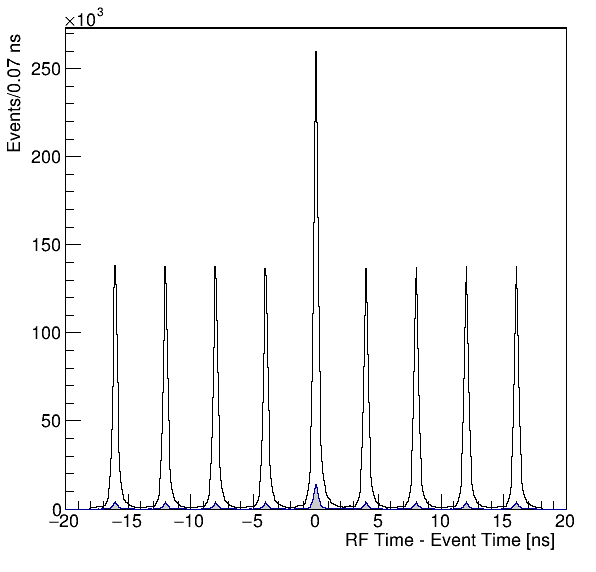

In [31]:
rf_timing_file = ROOT.TFile.Open('/work/halld/home/viducic/scripts/plotting/plot_delta_t.root')
hist_rf_timing = rf_timing_file.Get('RFTime')
hist_rf_timing_cut = rf_timing_file.Get('RFTimeCut')
hist_rf_timing_chi2_cut = rf_timing_file.Get('RFTimeChi2Cut')

hist_rf_timing.SetDirectory(0)
hist_rf_timing_cut.SetDirectory(0)
hist_rf_timing_chi2_cut.SetDirectory(0)

rf_timing_file.Close()

hist_rf_timing.SetLineColor(ROOT.kBlack)
hist_rf_timing_chi2_cut.SetFillColor(ROOT.kGray)
hist_rf_timing_cut.SetFillColor(ROOT.kGray)
hist_rf_timing_cut.SetLineColor(ROOT.kBlack)

hist_rf_timing.GetYaxis().SetTitle(f'Events/{hist_rf_timing.GetBinWidth(1):0.2f} ns')

c.Clear()
hist_rf_timing.Draw()
hist_rf_timing_chi2_cut.Draw('same')
# hist_rf_timing_cut.Draw('same')
c.Draw()


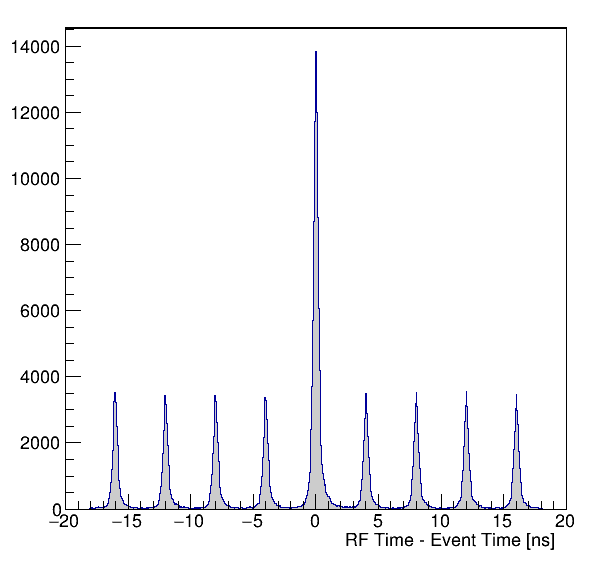

In [32]:
c.Clear()

hist_rf_timing_chi2_cut.Draw()

c.Draw()

## Kinfit $\chi^2/ndf$ and Kinfit Confidence Level

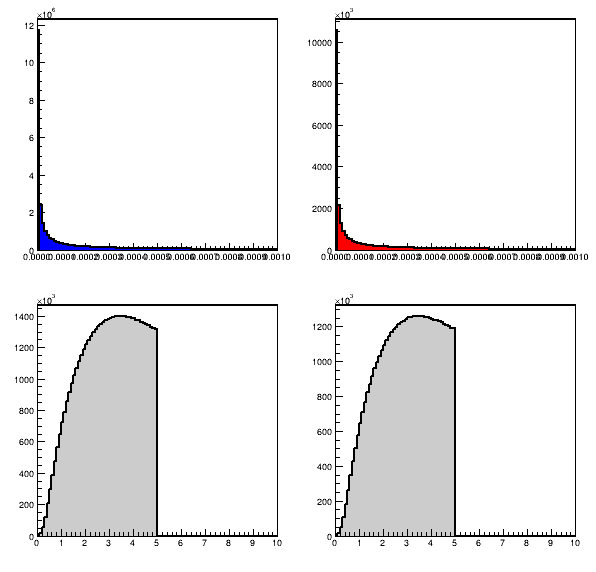

In [33]:
c.Clear()
c.Divide(2,2)

c.cd(1)
hist_kcl_pipkmks.Draw()
hist_kcl_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_kcl_pipkmks_cut.Draw('same')
c.cd(2)
hist_kcl_pimkpks.Draw()
hist_kcl_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_kcl_pimkpks_cut.Draw('same')
c.cd(3)
hist_x2ndf_pipkmks.Draw()
c.cd(4)
hist_x2ndf_pimkpks.Draw()
c.Draw()

## $M^{2}_{x}(pKK\pi)$

0.017032876867480777


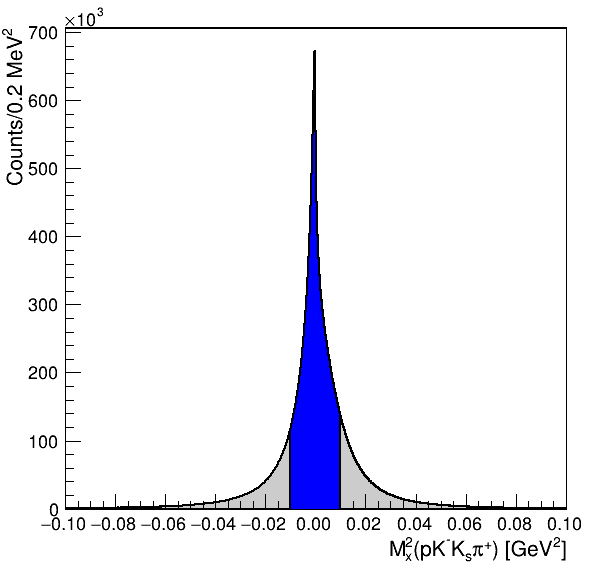

In [34]:
c.Clear()
# c.Divide(2,1)

# mx2all_xtitle = 'M_{x}^{2}(pKK#pi) [GeV^{2}]'
hist_mx2all_pipkmks.GetXaxis().SetTitle('M_{x}^{2}(pK^{-}K_{s}#pi^{+}) [GeV^{2}]')
# mx2all_ytitle = f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.3f}' + ' MeV^{2}'
hist_mx2all_pipkmks.GetYaxis().SetTitle(f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.1f}' +  ' MeV^{2}')
hist_mx2all_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_mx2all_pipkmks.GetYaxis().SetTitleOffset(1.4)
# hist_mx2all_pipkmks.GetXaxis().SetTitleSize(0.05)
hist_mx2all_pipkmks.GetXaxis().SetTitleOffset(1.1)


hist_mx2all_pimkpks.GetXaxis().SetTitle('M_{x}^{2}(pK^{+}K_{s}#pi^{-}) [GeV^{2}]')
hist_mx2all_pimkpks.GetYaxis().SetTitle(f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.1f}' +  ' MeV^{2}')
hist_mx2all_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_mx2all_pimkpks.GetYaxis().SetTitleOffset(1.54)

# title_hists([hist_mx2all_pimkpks, hist_mx2all_pipkmks], mx2all_xtitle, mx2all_ytitle)
# title_hists([hist_mx2all_pimkpks_cut, hist_mx2all_pipkmks_cut], mx2all_xtitle, mx2all_ytitle)
c.cd(1)
hist_mx2all_pipkmks.Draw()
hist_mx2all_pipkmks_cut.Draw('same')
# c.cd(2)
# hist_mx2all_pimkpks.Draw()
# hist_mx2all_pimkpks_cut.Draw('same')
print(hist_mx2all_pipkmks.GetStdDev())

c.Draw()


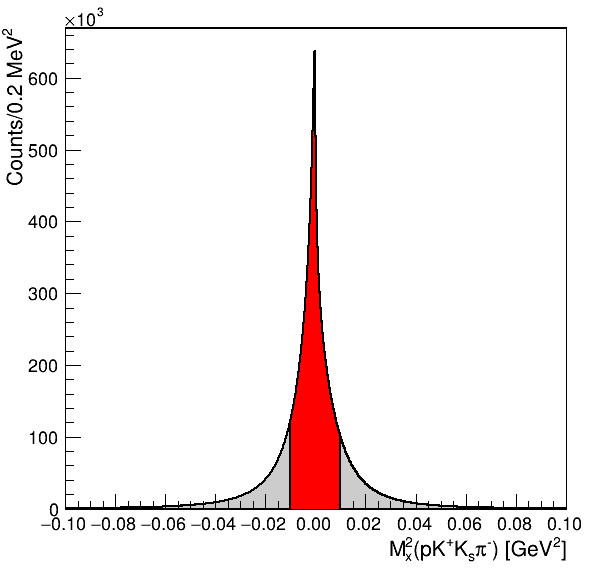

In [35]:
c.Clear()
# c.Divide(2,1)

# mx2all_xtitle = 'M_{x}^{2}(pKK#pi) [GeV^{2}]'
hist_mx2all_pipkmks.GetXaxis().SetTitle('M_{x}^{2}(pK^{-}K_{s}#pi^{+}) [GeV^{2}]')
# mx2all_ytitle = f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.3f}' + ' MeV^{2}'
hist_mx2all_pipkmks.GetYaxis().SetTitle(f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.1f}' +  ' MeV^{2}')
hist_mx2all_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_mx2all_pipkmks.GetYaxis().SetTitleOffset(1.4)
# hist_mx2all_pipkmks.GetXaxis().SetTitleSize(0.05)
hist_mx2all_pipkmks.GetXaxis().SetTitleOffset(1.1)


hist_mx2all_pimkpks.GetXaxis().SetTitle('M_{x}^{2}(pK^{+}K_{s}#pi^{-}) [GeV^{2}]')
hist_mx2all_pimkpks.GetYaxis().SetTitle(f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.1f}' +  ' MeV^{2}')
hist_mx2all_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_mx2all_pimkpks.GetYaxis().SetTitleOffset(1.4)

# title_hists([hist_mx2all_pimkpks, hist_mx2all_pipkmks], mx2all_xtitle, mx2all_ytitle)
# title_hists([hist_mx2all_pimkpks_cut, hist_mx2all_pipkmks_cut], mx2all_xtitle, mx2all_ytitle)
# c.cd(1)
# hist_mx2all_pipkmks.Draw()
# hist_mx2all_pipkmks_cut.Draw('same')
# c.cd(2)
hist_mx2all_pimkpks.Draw()
hist_mx2all_pimkpks_cut.Draw('same')
# print(hist_mx2all_pipkmks.GetStdDev())

c.Draw()

## $\vec{p}(p')$

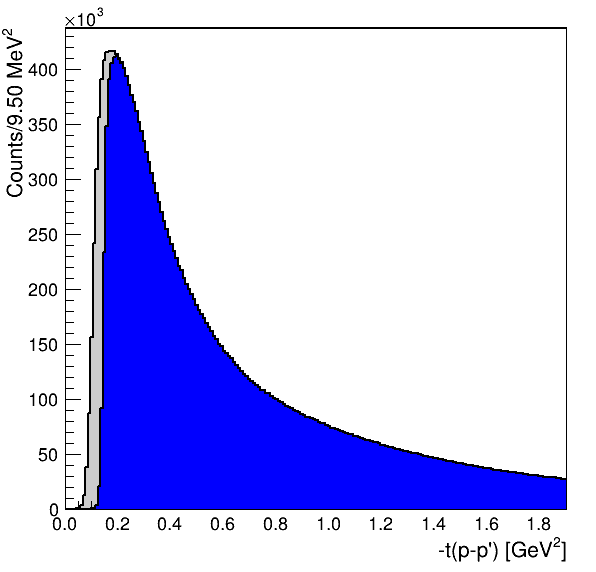

In [36]:
c.Clear()
pp_xtitle = "-t(p-p') [GeV^{2}]"
pp_ytitle = f'Counts/{1000*(pp_xhigh-pp_xlow)/pp_bins:.2f}' + ' MeV^{2}'

title_hists([hist_trange_pipkmks, hist_trange_pipkmks_cut], pp_xtitle, pp_ytitle, yoffset=1.4)

hist_trange_pipkmks_cut.SetFillColor(ROOT.kBlue)

hist_trange_pipkmks.Draw()
hist_trange_pipkmks_cut.Draw('same')
c.Draw()


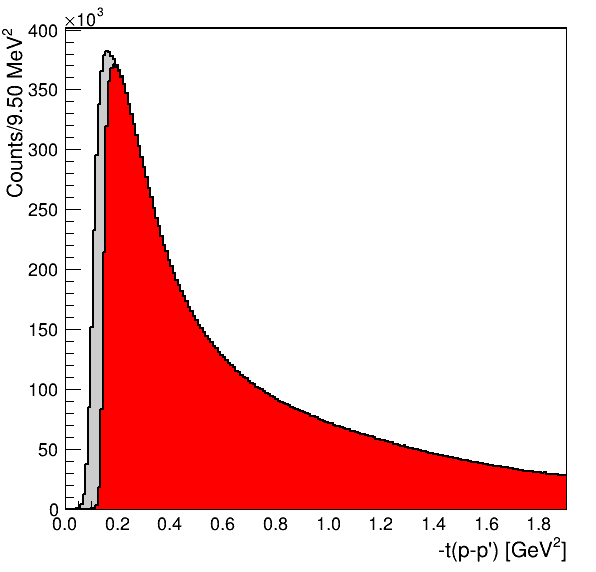

In [37]:
c.Clear()
pp_xtitle = "-t(p-p') [GeV^{2}]"
pp_ytitle = f'Counts/{1000*(pp_xhigh-pp_xlow)/pp_bins:.2f}' + ' MeV^{2}'

title_hists([hist_trange_pimkpks, hist_trange_pimkpks_cut], pp_xtitle, pp_ytitle, yoffset=1.4)

hist_trange_pimkpks_cut.SetFillColor(ROOT.kRed)

hist_trange_pimkpks.Draw()
hist_trange_pimkpks_cut.Draw('same')
c.Draw()

## Pathlength $\Delta r/\sigma_r$

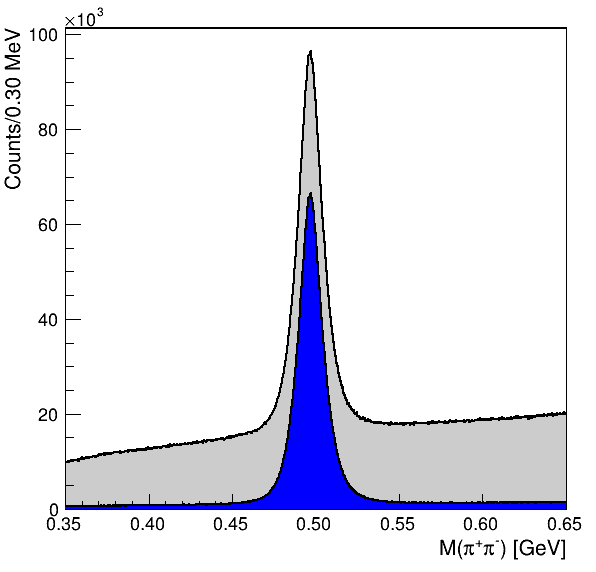

In [38]:
c.Clear()

ks_xtitle = 'M(#pi^{+}#pi^{-}) [GeV]'
ks_ytitle = f'Counts/{1000*(ks_xhigh-ks_xlow)/ks_bins:.2f}' + ' MeV'

title_hists([hist_ks_pipkmks, hist_ks_pipkmks_cut], ks_xtitle, ks_ytitle, yoffset=1.4)


hist_ks_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_ks_pipkmks.GetYaxis().SetRangeUser(0, 1.05*hist_ks_pipkmks.GetMaximum())

hist_ks_pipkmks.Draw()
hist_ks_pipkmks_cut.Draw('same')
c.Draw()

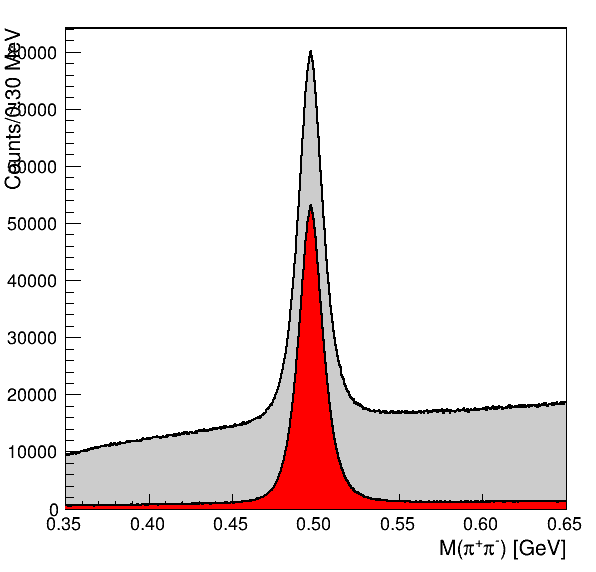

In [39]:
c.Clear()

ks_xtitle = 'M(#pi^{+}#pi^{-}) [GeV]'
ks_ytitle = f'Counts/{1000*(ks_xhigh-ks_xlow)/ks_bins:.2f}' + ' MeV'

title_hists([hist_ks_pimkpks, hist_ks_pimkpks_cut], ks_xtitle, ks_ytitle, yoffset=1.4)


hist_ks_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_ks_pimkpks.GetYaxis().SetRangeUser(0, 1.05*hist_ks_pimkpks.GetMaximum())

hist_ks_pimkpks.Draw()
hist_ks_pimkpks_cut.Draw('same')
c.Draw()

## $\Delta$ and $N^*$

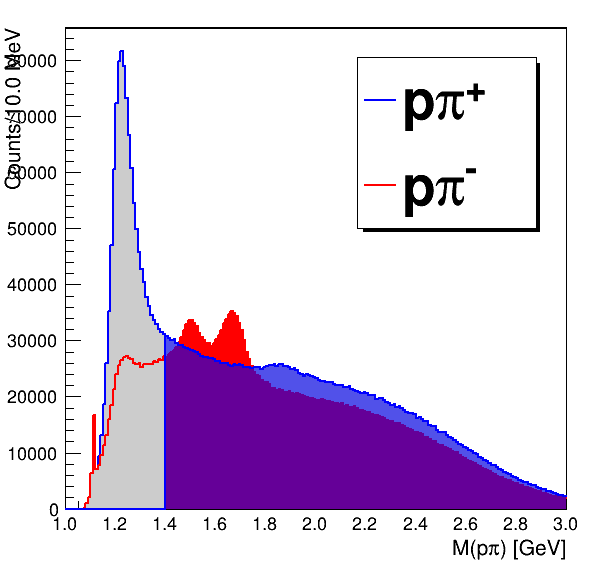

In [40]:
from my_library.common_analysis_tools import sort_hists_by_max


c.Clear()

ppi_xtitle = 'M(p#pi) [GeV]'
ppi_ytitle = f'Counts/{1000*(ppi_xhigh-ppi_xlow)/ppi_bins:.1f}' + ' MeV'

title_hists([hist_ppi_pipkmks, hist_ppi_pipkmks_cut, hist_ppi_pimkpks, hist_ks_pimkpks_cut], ppi_xtitle, ppi_ytitle, yoffset=1.4)

hist_ppi_pipkmks_cut.SetFillColorAlpha(ROOT.kBlue, 0.6)
hist_ppi_pimkpks_cut.SetFillColor(ROOT.kRed)

hist_ppi_pipkmks.SetLineColor(ROOT.kBlue)
hist_ppi_pipkmks_cut.SetLineColor(ROOT.kBlue)
hist_ppi_pimkpks.SetLineColor(ROOT.kRed)
hist_ppi_pimkpks_cut.SetLineColor(ROOT.kRed)

ppi_legend = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
ppi_legend.AddEntry(hist_ppi_pipkmks.GetPtr(), 'p#pi^{+}', 'l')
# ppi_legend.AddEntry(hist_ppi_pipkmks_cut.GetPtrpK^{-}K_{s}#pi^{+} (cut)', 'f')
ppi_legend.AddEntry(hist_ppi_pimkpks.GetPtr(), 'p#pi^{-}', 'l')
# ppi_legend.AddEntry(hist_ppi_pimkpks_cut.GetPtr(), 'pK^{+}K_{s}#pi^{-} (cut)', 'f')

sorted_hists = sort_hists_by_max([hist_ppi_pipkmks, hist_ppi_pipkmks_cut, hist_ppi_pimkpks, hist_ppi_pimkpks_cut])

sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
sorted_hists[2].Draw('same')
sorted_hists[3].Draw('same')
ppi_legend.Draw()
c.Draw()





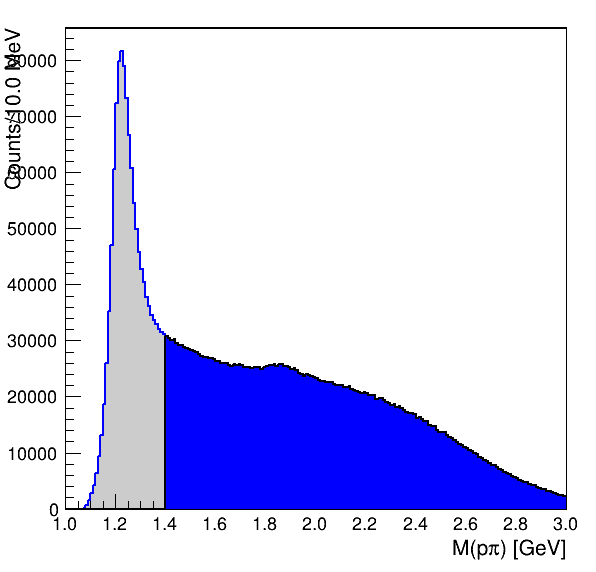

In [41]:
c.Clear()
hist_ppi_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_ppi_pipkmks_cut.SetLineColor(ROOT.kBlack)
hist_ppi_pipkmks.Draw()
hist_ppi_pipkmks_cut.Draw("same")
c.Draw()

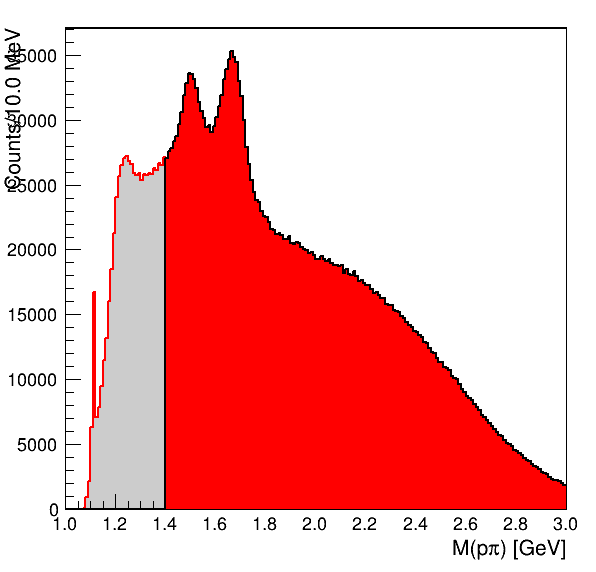

In [42]:
c.Clear()
hist_ppi_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_ppi_pimkpks_cut.SetLineColor(ROOT.kBlack)
hist_ppi_pimkpks.Draw()
hist_ppi_pimkpks_cut.Draw("same")
c.Draw()

## $\Lambda/\Sigma$

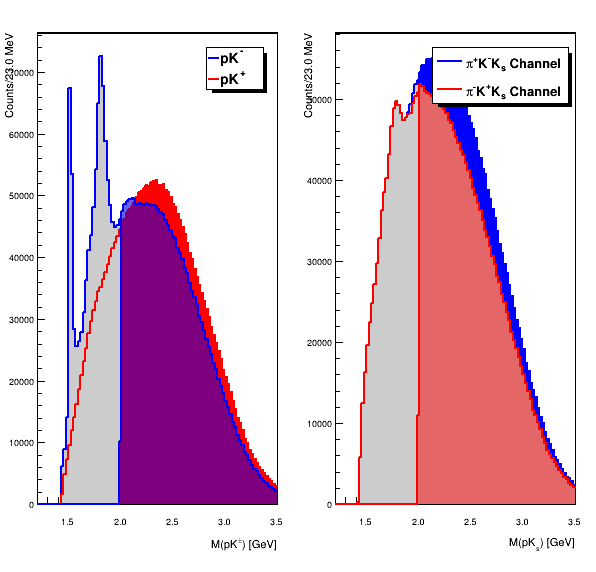

In [43]:
c.Clear()

ksp_xtitle = 'M(pK_{s}) [GeV]'
ksp_ytitle = f'Counts/{1000*(kp_xhigh-kp_xlow)/kp_bins:.1f}' + ' MeV'

kp_xtitle = 'M(pK^{#pm}) [GeV]'
kp_ytitle = f'Counts/{1000*(kp_xhigh-kp_xlow)/kp_bins:.1f}' + ' MeV'

title_hists([hist_pks_pipkmks, hist_pks_pipkmks_cut, hist_pks_pimkpks, hist_pks_pimkpks_cut], ksp_xtitle, ksp_ytitle, yoffset=1.5)
title_hists([hist_pk_pipkmks, hist_pk_pipkmks_cut, hist_pk_pimkpks, hist_pk_pimkpks_cut], kp_xtitle, kp_ytitle, yoffset=1.5)

hist_pks_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_pks_pimkpks_cut.SetFillColorAlpha(ROOT.kRed, 0.5)
hist_pk_pipkmks_cut.SetFillColorAlpha(ROOT.kBlue, 0.5)
hist_pk_pimkpks_cut.SetFillColor(ROOT.kRed)

hist_pks_pipkmks.SetLineColor(ROOT.kBlue)
hist_pks_pipkmks_cut.SetLineColor(ROOT.kBlue)
hist_pks_pimkpks.SetLineColor(ROOT.kRed)
hist_pks_pimkpks_cut.SetLineColor(ROOT.kRed)
hist_pk_pipkmks.SetLineColor(ROOT.kBlue)
hist_pk_pipkmks_cut.SetLineColor(ROOT.kBlue)
hist_pk_pimkpks.SetLineColor(ROOT.kRed)
hist_pk_pimkpks_cut.SetLineColor(ROOT.kRed)

ksp_legend = ROOT.TLegend(0.45, 0.825, 0.925, 0.925)
ksp_legend.SetTextSize(0.05)
ksp_legend.AddEntry(hist_pks_pipkmks.GetPtr(), '#pi^{+}K^{-}K_{s} Channel', 'l')
ksp_legend.AddEntry(hist_pks_pimkpks.GetPtr(), '#pi^{-}K^{+}K_{s} Channel', 'l')

kp_legend = ROOT.TLegend(0.7, 0.85, 0.9, 0.925)
kp_legend.SetTextSize(0.055)
kp_legend.AddEntry(hist_pk_pipkmks.GetPtr(), 'pK^{-}', 'l')
kp_legend.AddEntry(hist_pk_pimkpks.GetPtr(), 'pK^{+}', 'l')

sorted_pks = sort_hists_by_max([hist_pks_pipkmks, hist_pks_pipkmks_cut, hist_pks_pimkpks, hist_pks_pimkpks_cut])
sorted_pk = sort_hists_by_max([hist_pk_pipkmks, hist_pk_pipkmks_cut, hist_pk_pimkpks, hist_pk_pimkpks_cut])

c.Divide(2,1)
c.cd(1)
sorted_pk[0].Draw()
sorted_pk[1].Draw('same')
sorted_pk[2].Draw('same')
sorted_pk[3].Draw('same')
kp_legend.Draw()

c.cd(2)
sorted_pks[0].Draw()
sorted_pks[1].Draw('same')
sorted_pks[2].Draw('same')
sorted_pks[3].Draw('same')
ksp_legend.Draw()

c.Draw()

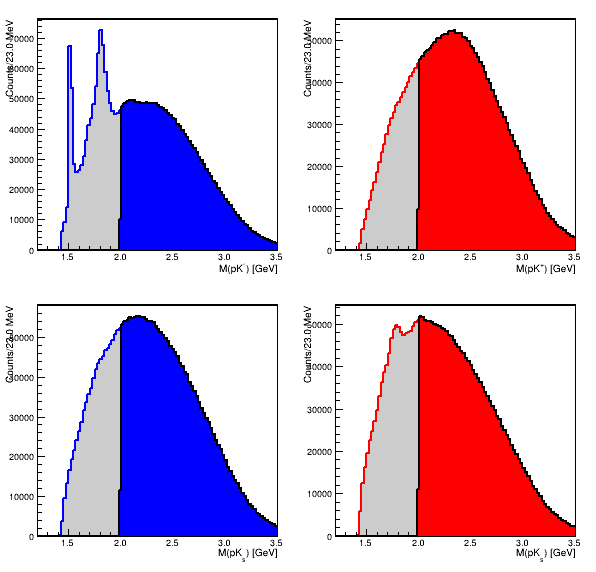

In [44]:
c.Clear()
c.Divide(2,2)

c.cd(1)
hist_pk_pipkmks.GetYaxis().SetTitleOffset(1.5)
hist_pk_pipkmks.GetXaxis().SetTitle('M(pK^{-}) [GeV]')
hist_pk_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_pk_pipkmks_cut.SetLineColor(ROOT.kBlack)
hist_pk_pipkmks.Draw()
hist_pk_pipkmks_cut.Draw('same')
c.cd(2)
hist_pk_pimkpks.GetYaxis().SetTitleOffset(1.5)
hist_pk_pimkpks.GetXaxis().SetTitle('M(pK^{+}) [GeV]')
hist_pk_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_pk_pimkpks_cut.SetLineColor(ROOT.kBlack)
hist_pk_pimkpks.Draw()
hist_pk_pimkpks_cut.Draw('same')
c.cd(3)
hist_pks_pipkmks.GetYaxis().SetTitleOffset(1.5)
hist_pks_pipkmks.GetXaxis().SetTitle('M(pK_{s}) [GeV]')
hist_pks_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_pks_pipkmks_cut.SetLineColor(ROOT.kBlack)
hist_pks_pipkmks.Draw()
hist_pks_pipkmks_cut.Draw('same')
c.cd(4)
hist_pks_pimkpks.GetYaxis().SetTitleOffset(1.5)
hist_pks_pimkpks.GetXaxis().SetTitle('M(pK_{s}) [GeV]')
hist_pks_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_pks_pimkpks_cut.SetLineColor(ROOT.kBlack)
hist_pks_pimkpks.Draw()
hist_pks_pimkpks_cut.Draw('same')
c.Draw()

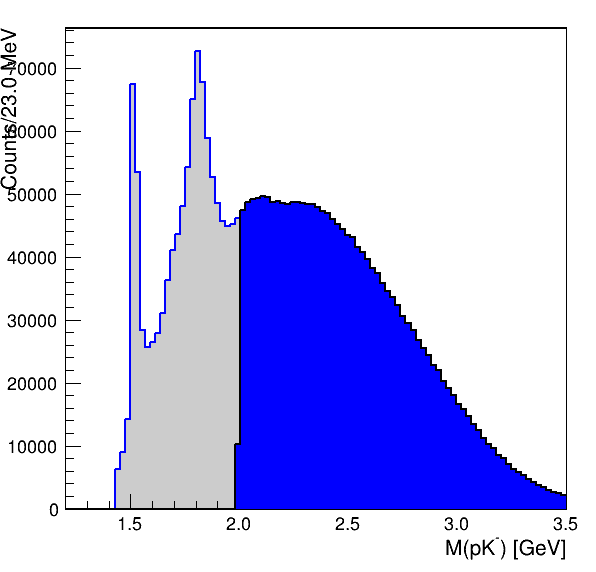

In [45]:
c.Clear()

hist_pk_pipkmks.GetYaxis().SetTitleOffset(1.5)
hist_pk_pipkmks.GetXaxis().SetTitle('M(pK^{-}) [GeV]')
hist_pk_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_pk_pipkmks_cut.SetLineColor(ROOT.kBlack)
hist_pk_pipkmks.Draw()
hist_pk_pipkmks_cut.Draw('same')

c.Draw()

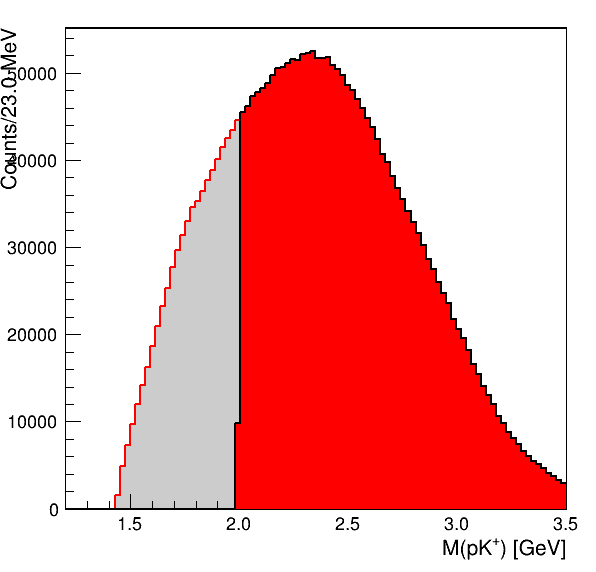

In [46]:
c.Clear()

hist_pk_pimkpks.GetYaxis().SetTitleOffset(1.5)
hist_pk_pimkpks.GetXaxis().SetTitle('M(pK^{+}) [GeV]')
hist_pk_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_pk_pimkpks_cut.SetLineColor(ROOT.kBlack)
hist_pk_pimkpks.Draw()
hist_pk_pimkpks_cut.Draw('same')

c.Draw()

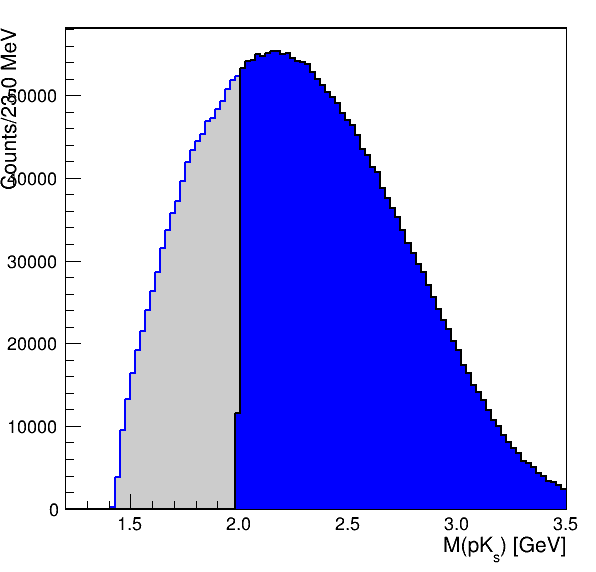

In [47]:
c.Clear()

hist_pks_pipkmks.GetYaxis().SetTitleOffset(1.5)
hist_pks_pipkmks.GetXaxis().SetTitle('M(pK_{s}) [GeV]')
hist_pks_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_pks_pipkmks_cut.SetLineColor(ROOT.kBlack)
hist_pks_pipkmks.Draw()
hist_pks_pipkmks_cut.Draw('same')

c.Draw()

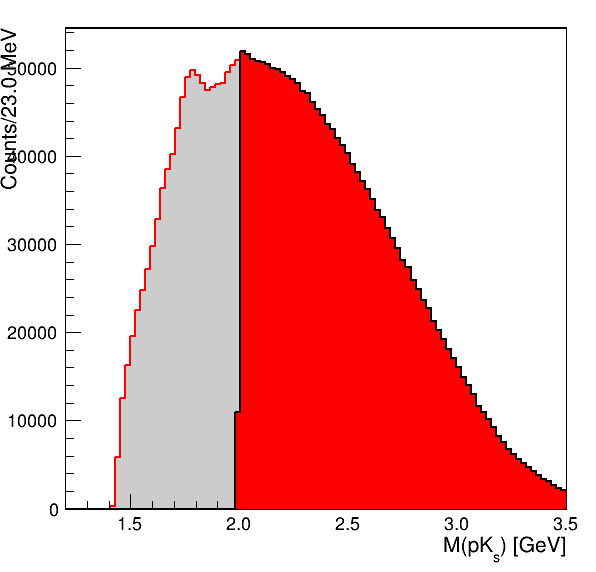

In [48]:
c.Clear()

hist_pks_pimkpks.GetYaxis().SetTitleOffset(1.5)
hist_pks_pimkpks.GetXaxis().SetTitle('M(pK_{s}) [GeV]')
hist_pks_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_pks_pimkpks_cut.SetLineColor(ROOT.kBlack)
hist_pks_pimkpks.Draw()
hist_pks_pimkpks_cut.Draw('same')
c.Draw()

## $KK\pi$ After Kinematics Cuts and Before $K^*$ Selection 

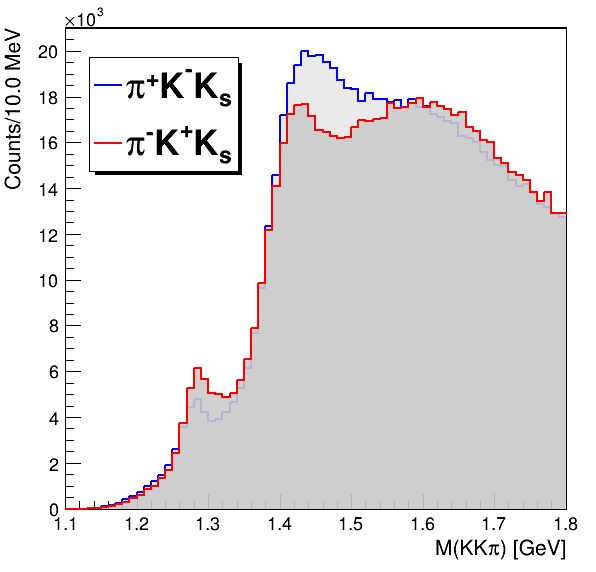

In [49]:
c.Clear()

ROOT.TGaxis.SetMaxDigits(4)

kkpi_xtitle = 'M(KK#pi) [GeV]'
kkpi_ytitle = f'Counts/{1000*(kkpi_xhigh-kkpi_xlow)/kkpi_bins:.1f}' + ' MeV'

title_hists([hist_kkpi_no_kstar_pipkmks, hist_kkpi_no_kstar_pimkpks], kkpi_xtitle, kkpi_ytitle, yoffset=1.4)

hist_kkpi_no_kstar_pipkmks.SetLineColor(ROOT.kBlue)
hist_kkpi_no_kstar_pimkpks.SetLineColor(ROOT.kRed)

hist_kkpi_no_kstar_pimkpks.SetFillColorAlpha(ROOT.kGray, 0.9)
hist_kkpi_no_kstar_pipkmks.SetFillColorAlpha(ROOT.kGray, 0.4)

hist_kkpi_no_kstar_pimkpks.GetYaxis().SetNoExponent(ROOT.kFALSE)

kkpi_legend = ROOT.TLegend(0.15, 0.7, 0.4, 0.9)
kkpi_legend.AddEntry(hist_kkpi_no_kstar_pipkmks.GetPtr(), '#pi^{+}K^{-}K_{s}', 'l')
kkpi_legend.AddEntry(hist_kkpi_no_kstar_pimkpks.GetPtr(), '#pi^{-}K^{+}K_{s}', 'l')

sorted_kkpi = sort_hists_by_max([hist_kkpi_no_kstar_pipkmks, hist_kkpi_no_kstar_pimkpks])

sorted_kkpi[0].Draw()
sorted_kkpi[1].Draw('same')
kkpi_legend.Draw()

c.Draw()

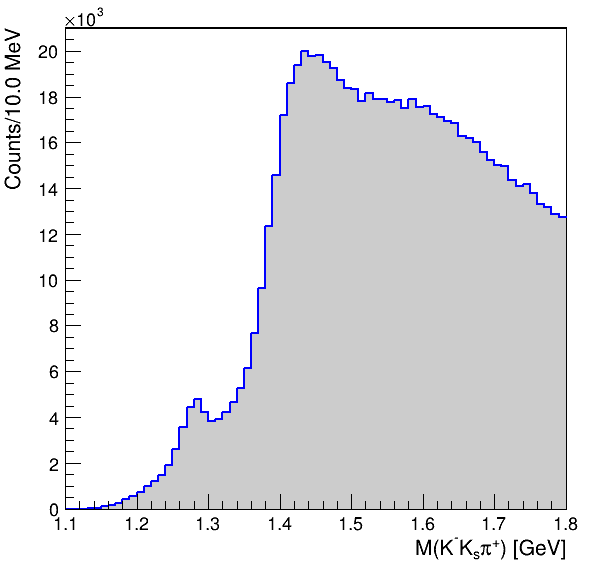

In [50]:
c.Clear()


hist_kkpi_no_kstar_pipkmks.SetLineColor(ROOT.kBlue)
hist_kkpi_no_kstar_pipkmks.SetFillColor(ROOT.kGray)
hist_kkpi_no_kstar_pipkmks.GetXaxis().SetTitle('M(K^{-}K_{s}#pi^{+}) [GeV]')

# hist_kkpi_no_kstar_pimkpks.GetYaxis().SetNoExponent(ROOT.kFALSE)
hist_kkpi_no_kstar_pipkmks.Draw()
c.Draw()

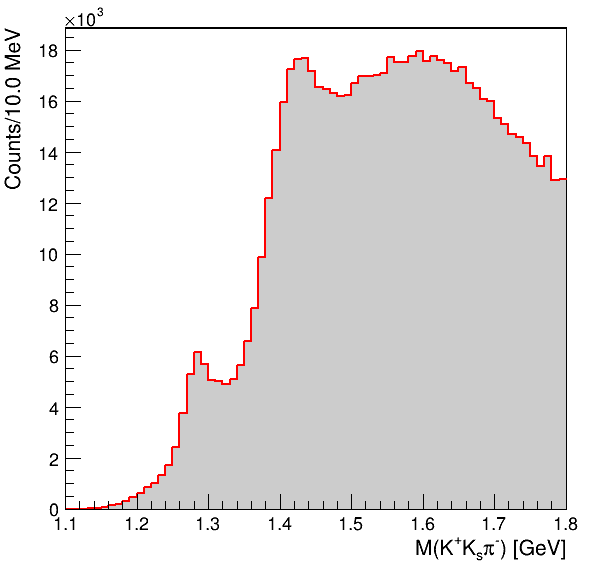

In [51]:
c.Clear()


hist_kkpi_no_kstar_pimkpks.SetLineColor(ROOT.kRed)
hist_kkpi_no_kstar_pimkpks.SetFillColor(ROOT.kGray)
hist_kkpi_no_kstar_pimkpks.GetXaxis().SetTitle('M(K^{+}K_{s}#pi^{-}) [GeV]')

# hist_kkpi_no_kstar_pimkpks.GetYaxis().SetNoExponent(ROOT.kFALSE)
hist_kkpi_no_kstar_pimkpks.Draw()
c.Draw()

## $K\pi$ Dalitz Plots

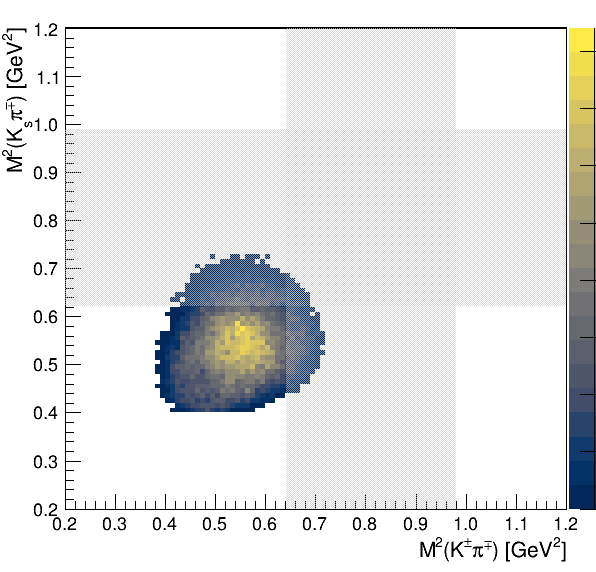

In [52]:
c.Clear()


kstar_dalitz_ylow = (cuts.CHARGED_KSTAR_MASS - 2*cuts.CHARGED_KSTAR_WIDTH)*(cuts.CHARGED_KSTAR_MASS - 2*cuts.CHARGED_KSTAR_WIDTH)
kstar_dalitz_yhigh = (cuts.CHARGED_KSTAR_MASS + 2*cuts.CHARGED_KSTAR_WIDTH)*(cuts.CHARGED_KSTAR_MASS + 2*cuts.CHARGED_KSTAR_WIDTH)
kstar_dalitz_xlow = (cuts.NEUTRAL_KSTAR_MASS - 2*cuts.NEUTRAL_KSTAR_WIDTH)*(cuts.NEUTRAL_KSTAR_MASS - 2*cuts.NEUTRAL_KSTAR_WIDTH)
kstar_dalitz_xhigh = (cuts.NEUTRAL_KSTAR_MASS + 2*cuts.NEUTRAL_KSTAR_WIDTH)*(cuts.NEUTRAL_KSTAR_MASS + 2*cuts.NEUTRAL_KSTAR_WIDTH)
kstar_neutral_box = ROOT.TBox(kstar_dalitz_xlow, 0.2, kstar_dalitz_xhigh, 1.2)
kstar_neutral_box.SetFillColorAlpha(ROOT.kGray, 0.7)
kstar_neutral_box.SetFillStyle(3001)
kstar_charged_box = ROOT.TBox(0.2,kstar_dalitz_ylow, 1.2, kstar_dalitz_yhigh)
kstar_charged_box.SetFillColorAlpha(ROOT.kGray, 0.7)
kstar_charged_box.SetFillStyle(3001)
                                                                          
hist_kstar_dalitz_pipkmks_1285.GetXaxis().SetTitle('M^{2}(K^{#pm}#pi^{#mp}) [GeV^{2}]')
hist_kstar_dalitz_pipkmks_1285.GetYaxis().SetTitle('M^{2}(K_{s}#pi^{#mp}) [GeV^{2}]')
hist_kstar_dalitz_pipkmks_1285.Draw('colz')
kstar_neutral_box.Draw()
kstar_charged_box.Draw()
c.Draw()

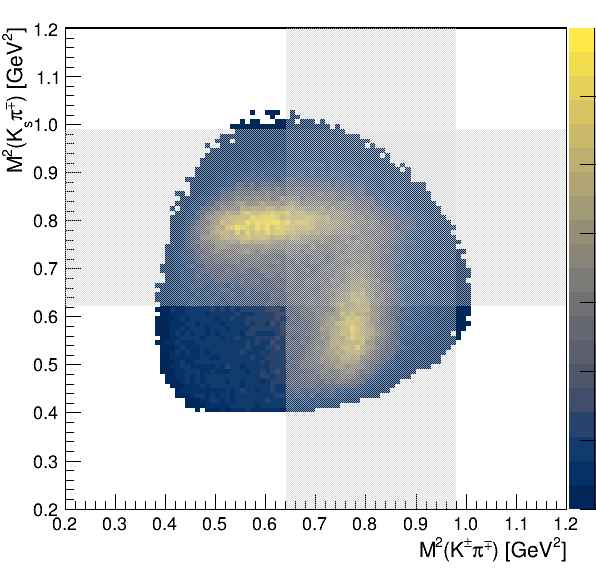

In [53]:
c.Clear()
                                                                          
hist_kstar_dalitz_pipkmks_1400.GetXaxis().SetTitle('M^{2}(K^{#pm}#pi^{#mp}) [GeV^{2}]')
hist_kstar_dalitz_pipkmks_1400.GetYaxis().SetTitle('M^{2}(K_{s}#pi^{#mp}) [GeV^{2}]')
hist_kstar_dalitz_pipkmks_1400.Draw('colz')
kstar_neutral_box.Draw()
kstar_charged_box.Draw()
c.Draw()

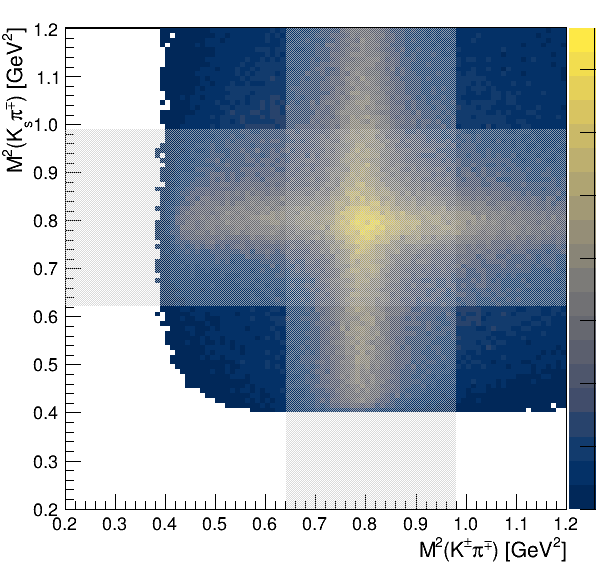

In [54]:
c.Clear()
                                                                          
hist_kstar_dalitz_pipkmks_1500.GetXaxis().SetTitle('M^{2}(K^{#pm}#pi^{#mp}) [GeV^{2}]')
hist_kstar_dalitz_pipkmks_1500.GetYaxis().SetTitle('M^{2}(K_{s}#pi^{#mp}) [GeV^{2}]')
hist_kstar_dalitz_pipkmks_1500.Draw('colz')
kstar_neutral_box.Draw()
kstar_charged_box.Draw()
c.Draw()

## $K^*$ Rejection

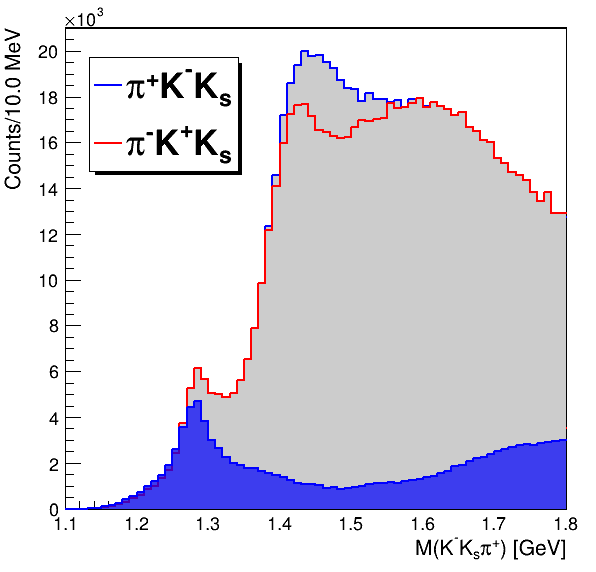

In [55]:
c.Clear()

title_hists([hist_kkpi_kstar_rejected_pipkmks, hist_kkpi_kstar_rejected_pimkpks], kkpi_xtitle, kkpi_ytitle, yoffset=1.4)

hist_kkpi_kstar_rejected_pipkmks.SetFillColorAlpha(ROOT.kBlue, 0.7)
hist_kkpi_kstar_rejected_pimkpks.SetFillColor(ROOT.kRed)
hist_kkpi_kstar_rejected_pipkmks.SetLineColor(ROOT.kBlue)
hist_kkpi_kstar_rejected_pimkpks.SetLineColor(ROOT.kRed)

sorted_kstar_reject_hists = sort_hists_by_max([hist_kkpi_kstar_rejected_pipkmks, hist_kkpi_kstar_rejected_pimkpks, hist_kkpi_no_kstar_pipkmks, hist_kkpi_no_kstar_pimkpks])

sorted_kstar_reject_hists[0].Draw()
sorted_kstar_reject_hists[2].Draw('same')
sorted_kstar_reject_hists[1].Draw('same')
sorted_kstar_reject_hists[3].Draw('same')
kkpi_legend.Draw()

c.Draw()



## Charged $K^*$ Selection

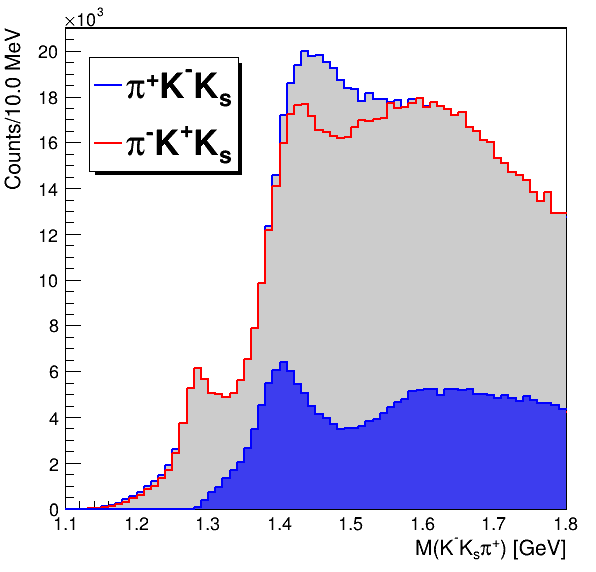

In [56]:
c.Clear()

title_hists([hist_kkpi_kstar_charged_selected_pipkmks, hist_kkpi_kstar_charged_selected_pimkpks], kkpi_xtitle, kkpi_ytitle, yoffset=1.4)

hist_kkpi_kstar_charged_selected_pipkmks.SetFillColorAlpha(ROOT.kBlue, 0.7)
hist_kkpi_kstar_charged_selected_pimkpks.SetFillColor(ROOT.kRed)
hist_kkpi_kstar_charged_selected_pipkmks.SetLineColor(ROOT.kBlue)
hist_kkpi_kstar_charged_selected_pimkpks.SetLineColor(ROOT.kRed)

sorted_kstar_select_charged_hists = sort_hists_by_max([hist_kkpi_kstar_charged_selected_pipkmks, hist_kkpi_kstar_charged_selected_pimkpks, hist_kkpi_no_kstar_pipkmks, hist_kkpi_no_kstar_pimkpks])

sorted_kstar_select_charged_hists[0].Draw()
sorted_kstar_select_charged_hists[2].Draw('same')
sorted_kstar_select_charged_hists[1].Draw('same')
sorted_kstar_select_charged_hists[3].Draw('same')
kkpi_legend.Draw()

c.Draw()

## Neutral $K^*$ Selection

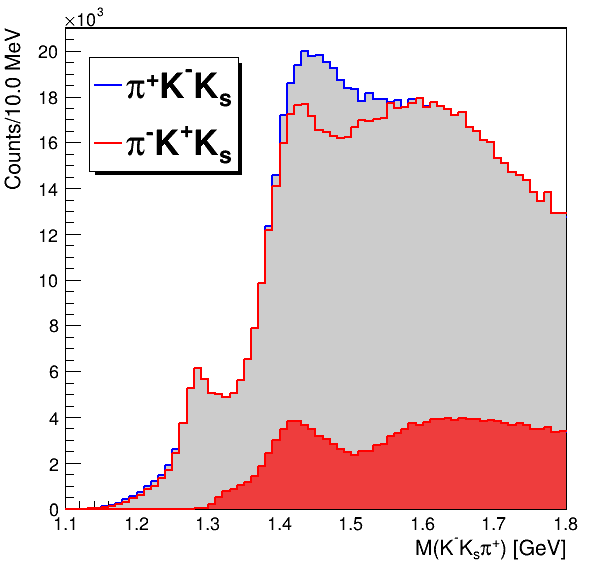

In [57]:
c.Clear()

title_hists([hist_kkpi_kstar_neutral_selected_pipkmks, hist_kkpi_kstar_neutral_selected_pimkpks], kkpi_xtitle, kkpi_ytitle, yoffset=1.4)

hist_kkpi_kstar_neutral_selected_pipkmks.SetFillColor(ROOT.kBlue)
hist_kkpi_kstar_neutral_selected_pimkpks.SetFillColorAlpha(ROOT.kRed, 0.7)
hist_kkpi_kstar_neutral_selected_pipkmks.SetLineColor(ROOT.kBlue)
hist_kkpi_kstar_neutral_selected_pimkpks.SetLineColor(ROOT.kRed)

sorted_kstar_select_neutral_hists = sort_hists_by_max([hist_kkpi_kstar_neutral_selected_pipkmks, hist_kkpi_kstar_neutral_selected_pimkpks, hist_kkpi_no_kstar_pipkmks, hist_kkpi_no_kstar_pimkpks])

sorted_kstar_select_neutral_hists[0].Draw()
sorted_kstar_select_neutral_hists[2].Draw('same')
sorted_kstar_select_neutral_hists[1].Draw('same')
sorted_kstar_select_neutral_hists[3].Draw('same')
kkpi_legend.Draw()

c.Draw()

## Phasespace efficiency for $K^*$ Rejection 

In [58]:
# code found at: /work/halld/home/viducic/scripts/crosssection/kstar_rejection_dalitz_efficiency.ipynb

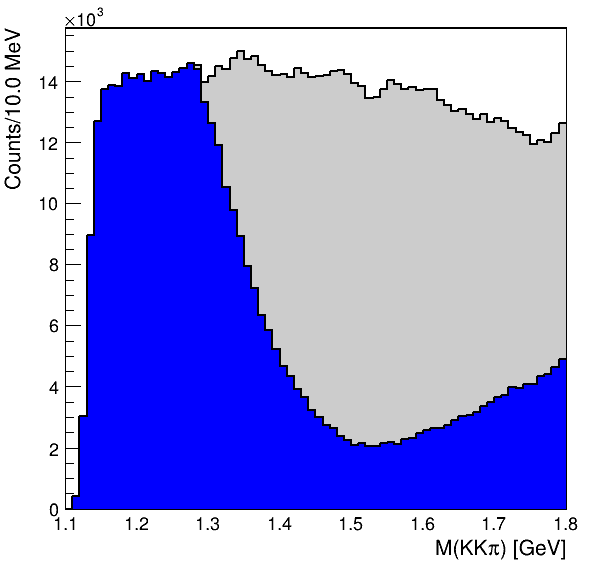

In [59]:
c.Clear()

title_hists([hist_ps_kkpi_before, hist_ps_kkpi_after], kkpi_xtitle, kkpi_ytitle, yoffset=1.4)

hist_ps_kkpi_after.SetFillColor(ROOT.kBlue)

hist_ps_kkpi_before.Draw()
hist_ps_kkpi_after.Draw('same')

c.Draw()

## $K^*$ efficiency correction thrown MC

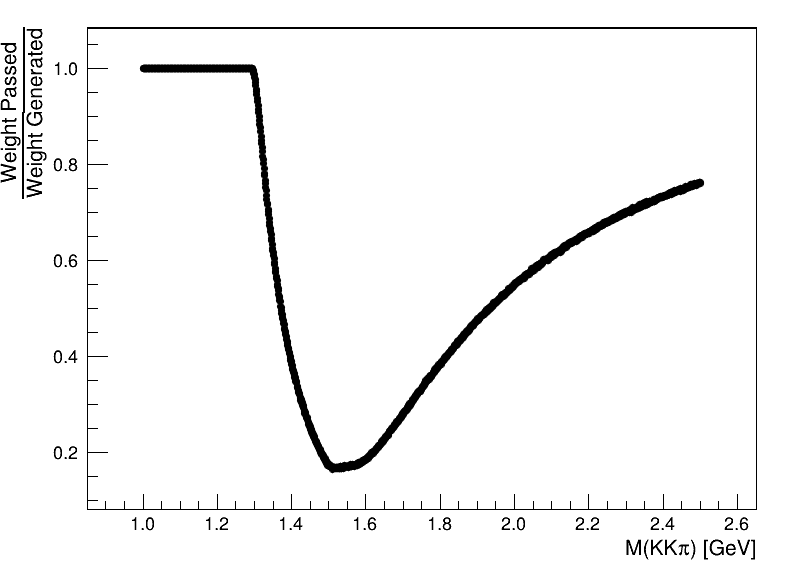

In [60]:
c.Clear()
graph.GetXaxis().SetTitle("M(KK#pi) [GeV]")
graph.GetYaxis().SetTitle("#frac{Weight Passed}{Weight Generated}")
graph.SetMarkerStyle(20)
graph.SetMarkerSize(0.75)
graph.SetMarkerColor(ROOT.kBlack)

c = ROOT.TCanvas()
graph.Draw("AP")
c.Update()
c.Draw()

## $\epsilon$ corrected $KK\pi$ Distributions 

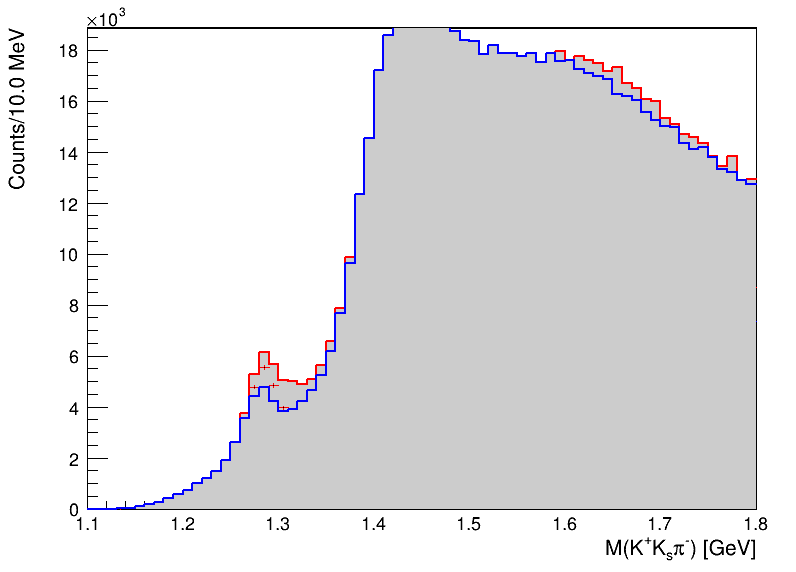

In [61]:
c.Clear()


hist_eff_corrected_pipkmks.SetLineColor(ROOT.kBlue)
hist_eff_corrected_pimkpks.SetLineColor(ROOT.kRed)

hist_eff_corrected_pimkpks.GetXaxis().SetRangeUser(1.1, 1.8)
hist_eff_corrected_pipkmks.GetXaxis().SetRangeUser(1.1, 1.8)


hist_kkpi_no_kstar_pimkpks.Draw()
hist_eff_corrected_pimkpks.Draw('same')
hist_eff_corrected_pipkmks.Draw('same')
hist_kkpi_no_kstar_pipkmks.Draw('same')


c.Draw()

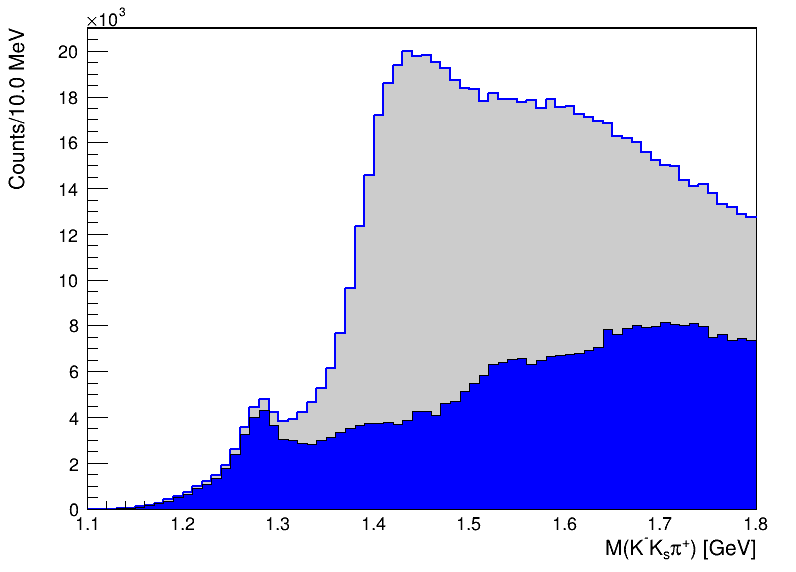

In [62]:
c.Clear()

hist_kkpi_no_kstar_pipkmks.GetXaxis().SetTitle('M(K^{-}K_{s}#pi^{+}) [GeV]')
hist_kkpi_no_kstar_pipkmks.SetFillColor(ROOT.kGray)
hist_eff_corrected_pipkmks.SetFillColor(ROOT.kBlue)
hist_eff_corrected_pipkmks.SetLineColor(ROOT.kBlack)

hist_kkpi_no_kstar_pipkmks.Draw()
hist_eff_corrected_pipkmks.Draw('same hist')


c.Draw()

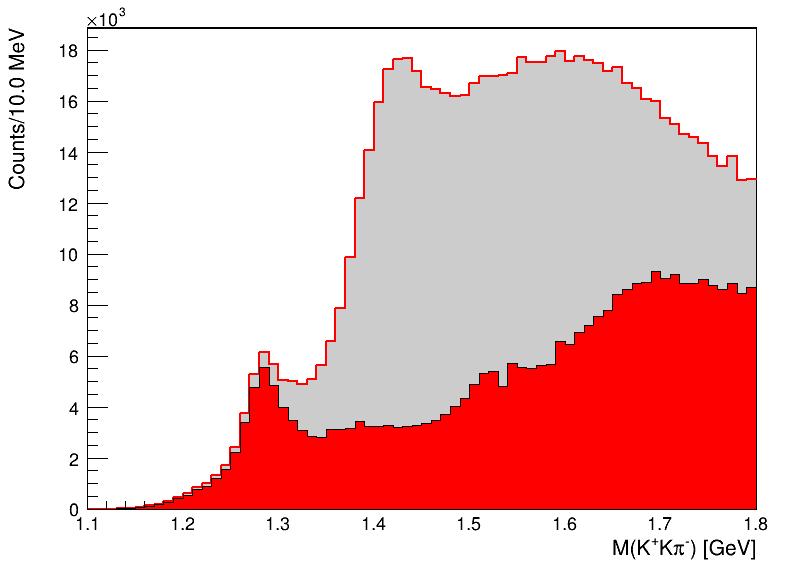

In [63]:
c.Clear()

hist_kkpi_no_kstar_pimkpks.GetXaxis().SetTitle('M(K^{+}K#pi^{-}) [GeV]')
hist_kkpi_no_kstar_pimkpks.SetFillColor(ROOT.kGray)
hist_eff_corrected_pimkpks.SetFillColor(ROOT.kRed)
hist_eff_corrected_pimkpks.SetLineColor(ROOT.kBlack)

hist_kkpi_no_kstar_pimkpks.Draw()
hist_eff_corrected_pimkpks.Draw('same hist')


c.Draw()

## Acceptance 

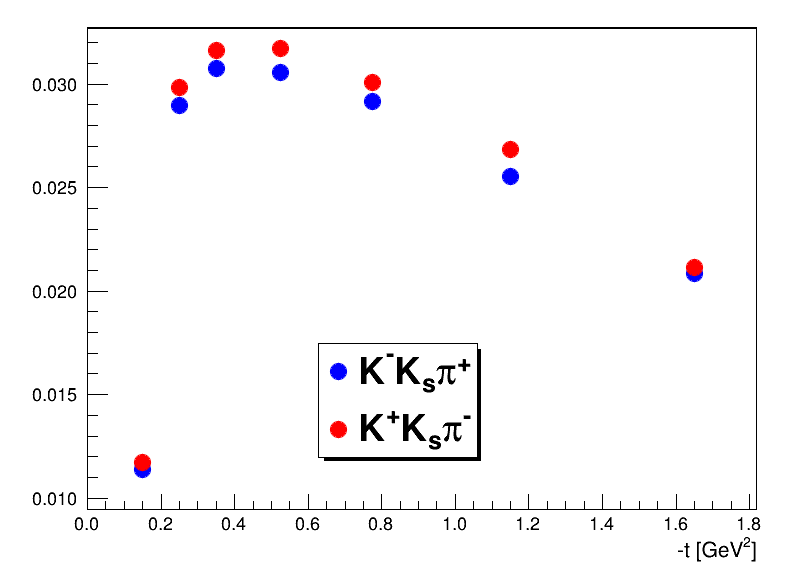

In [64]:
c.Clear()
# graph_pipkmks = ROOT.TGraphErrors()
# graph_pimkpks = ROOT.TGraphErrors()

pipkmks_bin_middles = []
pipkmks_effs = []
pimkpks_bin_middles = []
pimkpks_effs = []

for pipeff, pimeff in zip(pipkmks_eff, pimkpks_eff):

    e = pipeff[1]
    t = pipeff[2]

    if e != 8:
        continue

    t_bin_middle = (constants.T_CUT_DICT[t][0] + constants.T_CUT_DICT[t][1])/2.0
    pipkmks_effs.append(pipeff[0][0])
    pipkmks_bin_middles.append(t_bin_middle)
    pimkpks_effs.append(pimeff[0][0])
    pimkpks_bin_middles.append(t_bin_middle)

graph_pipkmks = ROOT.TGraph(len(np.array(pipkmks_bin_middles)), np.array(pipkmks_bin_middles), np.array(pipkmks_effs))
graph_pipkmks.SetMarkerSize(2)
graph_pipkmks.SetMarkerStyle(20)
graph_pipkmks.SetMarkerColor(ROOT.kBlue)

graph_pimkpks = ROOT.TGraph(len(np.array(pimkpks_bin_middles)), np.array(pimkpks_bin_middles), np.array(pimkpks_effs))
graph_pimkpks.SetMarkerSize(2)
graph_pimkpks.SetMarkerStyle(20)
graph_pimkpks.SetMarkerColor(ROOT.kRed)

acceptance_legend = ROOT.TLegend(0.4, 0.2, 0.6, 0.4)
acceptance_legend.AddEntry(graph_pipkmks, 'K^{-}K_{s}#pi^{+}', 'p')
acceptance_legend.AddEntry(graph_pimkpks, 'K^{+}K_{s}#pi^{-}', 'p')

graph_pipkmks.GetXaxis().SetRangeUser(0, 2.0)
graph_pipkmks.GetXaxis().SetTitle('-t [GeV^{2}]')
graph_pipkmks.SetTitle("E_{#gamme} = 8 GeV")
graph_pimkpks.SetTitle("E_{#gamme} = 8 GeV")

graph_pipkmks.Draw("AP")
graph_pimkpks.Draw("P")
acceptance_legend.Draw()
c.Draw()
    

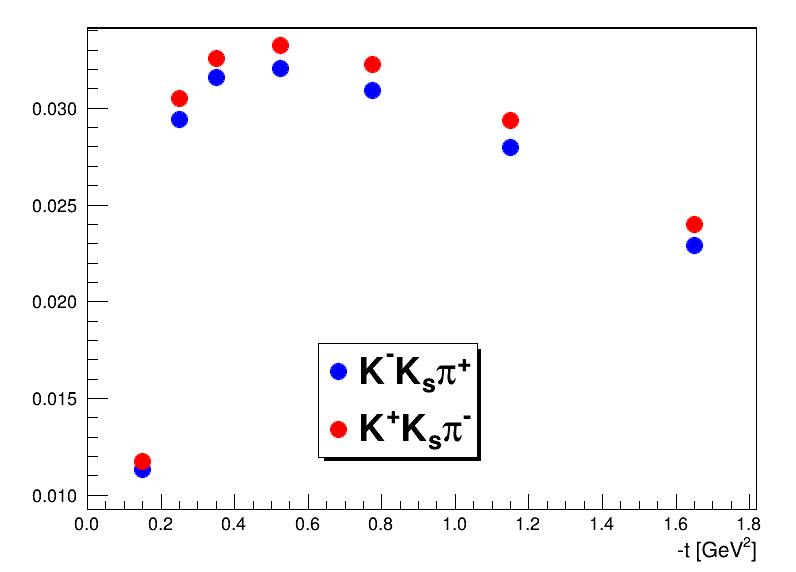

In [65]:
c.Clear()
# graph_pipkmks = ROOT.TGraphErrors()
# graph_pimkpks = ROOT.TGraphErrors()

pipkmks_bin_middles = []
pipkmks_effs = []
pimkpks_bin_middles = []
pimkpks_effs = []

for pipeff, pimeff in zip(pipkmks_eff, pimkpks_eff):

    e = pipeff[1]
    t = pipeff[2]

    if e != 9:
        continue

    t_bin_middle = (constants.T_CUT_DICT[t][0] + constants.T_CUT_DICT[t][1])/2.0
    pipkmks_effs.append(pipeff[0][0])
    pipkmks_bin_middles.append(t_bin_middle)
    pimkpks_effs.append(pimeff[0][0])
    pimkpks_bin_middles.append(t_bin_middle)

graph_pipkmks = ROOT.TGraph(len(np.array(pipkmks_bin_middles)), np.array(pipkmks_bin_middles), np.array(pipkmks_effs))
graph_pipkmks.SetMarkerSize(2)
graph_pipkmks.SetMarkerStyle(20)
graph_pipkmks.SetMarkerColor(ROOT.kBlue)

graph_pimkpks = ROOT.TGraph(len(np.array(pimkpks_bin_middles)), np.array(pimkpks_bin_middles), np.array(pimkpks_effs))
graph_pimkpks.SetMarkerSize(2)
graph_pimkpks.SetMarkerStyle(20)
graph_pimkpks.SetMarkerColor(ROOT.kRed)

acceptance_legend = ROOT.TLegend(0.4, 0.2, 0.6, 0.4)
acceptance_legend.AddEntry(graph_pipkmks, 'K^{-}K_{s}#pi^{+}', 'p')
acceptance_legend.AddEntry(graph_pimkpks, 'K^{+}K_{s}#pi^{-}', 'p')

graph_pipkmks.GetXaxis().SetRangeUser(0, 2.0)
graph_pipkmks.GetXaxis().SetTitle('-t [GeV^{2}]')
graph_pipkmks.SetTitle("E_{#gamme} = 8 GeV")
graph_pimkpks.SetTitle("E_{#gamme} = 8 GeV")

graph_pipkmks.Draw("AP")
graph_pimkpks.Draw("P")
acceptance_legend.Draw()
c.Draw()

## Data and MC Comparison

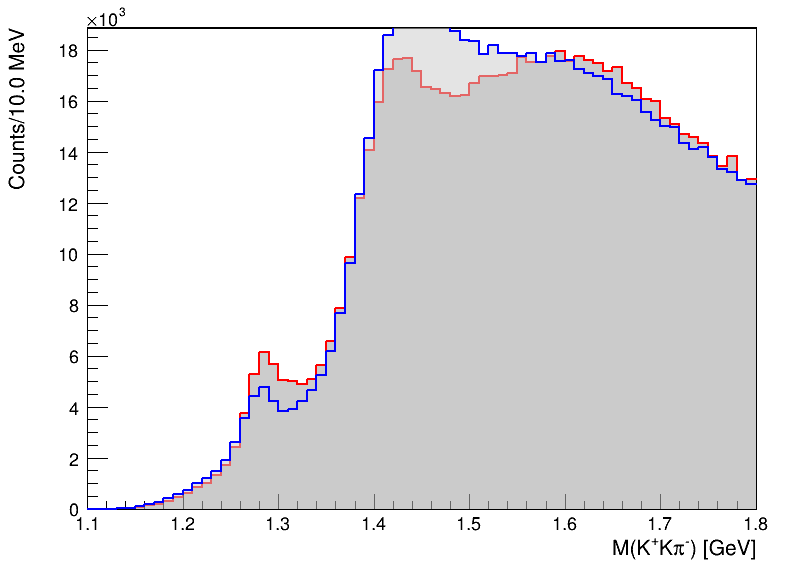

In [66]:
c.Clear()

hist_kkpi_no_kstar_pipkmks.SetFillColorAlpha(ROOT.kGray, 0.5)
hist_kkpi_no_kstar_pimkpks.Draw()
hist_kkpi_no_kstar_pipkmks.Draw('same')

c.Draw()

0.4785070971798307
0.5163625293892606
 FCN=4537.54 FROM MIGRAD    STATUS=CONVERGED     482 CALLS         483 TOTAL
                     EDM=2.53219e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.83636e+04   1.04240e+02   4.64245e-01   4.26984e-06
   2  p1           4.97023e-01   6.51154e-06   2.41329e-08  -4.38774e+01
   3  p2           6.44905e-03   1.29235e-05   8.09941e-07  -3.35342e+00
   4  p3           1.39810e+04   1.15482e+02  -6.16972e-01  -5.33800e-06
   5  p4           4.98081e-01   1.78036e-05   1.16891e-07   2.09205e+01
   6  p5           1.42002e-02   3.74446e-05   1.90376e-06  -1.87288e+00
   7  p6          -3.10147e+02   1.14841e+01  -2.50703e-02   7.37424e-05
   8  p7           2.82216e+03   2.33257e+01   4.23139e-02   3.51486e-05
                               ERR DEF= 0.5


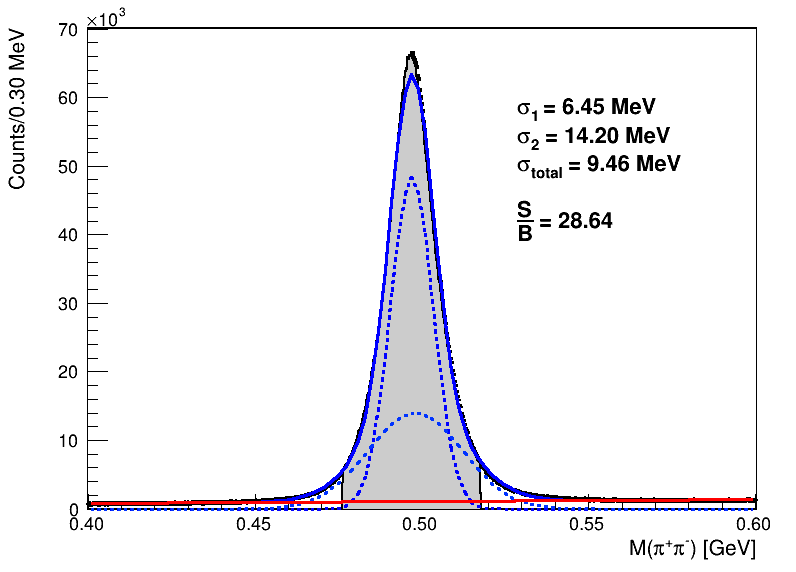

In [67]:
ks_fit = ROOT.TF1('ks_fit', '[0] * TMath::Gaus(x, [1], [2]) + [3] * TMath::Gaus(x, [4], [5]) + [6] + [7]*x', 0.4, 0.6)
ks_fit.SetParameter(0, 60000)
ks_fit.SetParameter(1, 0.5)
ks_fit.SetParameter(2, 0.01)
ks_fit.SetParLimits(2, 0.0, 1)
ks_fit.SetParameter(3, 10000)
ks_fit.SetParameter(4, 0.5)
ks_fit.SetParameter(5, 0.01)
ks_fit.SetParLimits(5, 0.0, 1)
ks_fit.SetParameter(6, 10)
ks_fit.SetParameter(7, 5000)

result = hist_ks_pipkmks_cut.Fit(ks_fit, 'LSR0')

g1 = ROOT.TF1('gaus1', '[0] * TMath::Gaus(x, [1], [2])', 0.4, 0.6)
g2 = ROOT.TF1('gaus2', '[0] * TMath::Gaus(x, [1], [2])', 0.4, 0.6)
p1 = ROOT.TF1('pol1', '[0] + [1]*x', 0.4, 0.6)

g1.SetParameters(ks_fit.GetParameter(0), ks_fit.GetParameter(1), ks_fit.GetParameter(2))
g2.SetParameters(ks_fit.GetParameter(3), ks_fit.GetParameter(4), ks_fit.GetParameter(5))
p1.SetParameters(ks_fit.GetParameter(6), ks_fit.GetParameter(7))

ks_fit.SetLineColor(ROOT.kBlue)


g1.SetLineColor(ROOT.kBlue)
g1.SetLineStyle(2)
g2.SetLineColor(ROOT.kAzure)
g2.SetLineStyle(4)
p1.SetLineColor(ROOT.kRed)

integral1 = g1.Integral(0.4, 0.6)
integral2 = g2.Integral(0.4, 0.6)
integral_bkg = p1.Integral(0.4, 0.6)

frac = integral1/(integral1 + integral2)

sigma1 = g1.GetParameter(2)
sigma2 = g2.GetParameter(2)

mean1 = g1.GetParameter(1)
mean2 = g2.GetParameter(1)

sigma_total = sigma1 * frac + sigma2 * (1.0 - frac)
mean_total = mean1 * frac + mean2 * (1.0 - frac)

int_region_low = mean_total - 2 * sigma_total
int_region_high = mean_total + 2 * sigma_total

print(int_region_low)
print(int_region_high)

s_over_b = (g1.Integral(int_region_low, int_region_high) + g2.Integral(int_region_low, int_region_high))/p1.Integral(int_region_low, int_region_high)

c.Clear()
hist_ks_pipkmks_cut.SetFillColor(ROOT.kWhite)
hist_ks_pipkmks_cut.SetLineWidth(5)
hist_ks_pipkmks_cut.GetXaxis().SetRangeUser(0.4, 0.6)
hist_ks_pipkmks_cut.Draw("E")
hist_ks_pipkmks_cut_2.Draw("same")
ks_fit.Draw('same')
g1.Draw('same')
g2.Draw('same')
p1.Draw('same')

fit_params = ROOT.TLatex()
fit_params.SetTextSize(0.0425)
fit_params.DrawLatexNDC(0.65, 0.8, "#sigma_{1} = " + '{:.2f}'.format(sigma1 * 1000) + ' MeV')
fit_params.DrawLatexNDC(0.65, 0.75, "#sigma_{2} = " + '{:.2f}'.format(sigma2 * 1000) + ' MeV')
fit_params.DrawLatexNDC(0.65, 0.7, "#sigma_{total} = " + '{:.2f}'.format(sigma_total * 1000) + ' MeV')
fit_params.DrawLatexNDC(0.65, 0.6, "#frac{S}{B} = " + '{:.2f}'.format(s_over_b))

c.Draw()

 FCN=84.7801 FROM MIGRAD    STATUS=CONVERGED     117 CALLS         118 TOTAL
                     EDM=1.51528e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.49875e+01   5.19970e-01  -2.50706e-03  -1.28724e-04
   2  p1           1.28500e+00     fixed    
   3  p2           1.13130e-02   1.87982e-04   1.00843e-07   2.08227e-01
   4  p3           2.20000e-02     fixed    


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


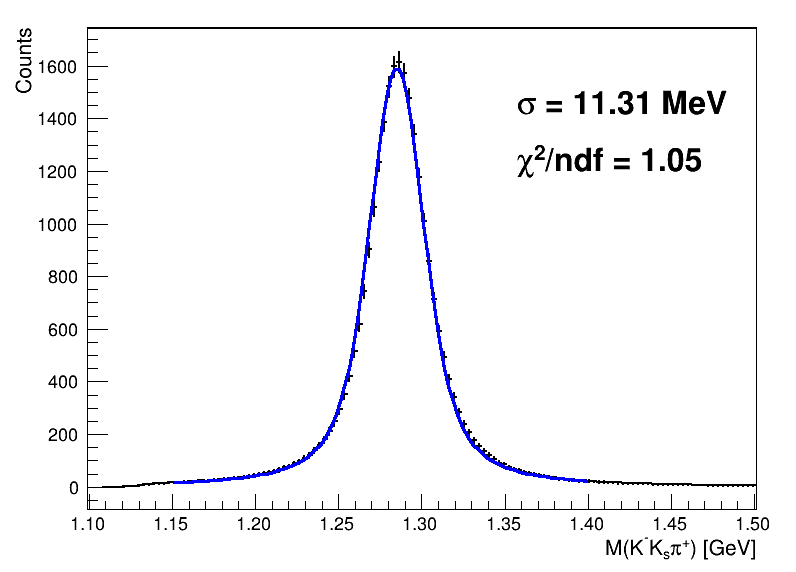

In [68]:
res_signal_mc = tools.get_integrated_gluex1_signal_mc_hist_for_resolution_fitting('pipkmks', scale_factor=50, nbins = 500)
tools.set_sqrtN_error(res_signal_mc)
res_signal_mc.GetXaxis().SetTitle('M(K^{-}K_{s}#pi^{+}) [GeV]')
res_signal_mc.GetYaxis().SetTitle('Counts')
res_signal_mc.GetXaxis().SetRangeUser(1.1, 1.5)

res_func = ROOT.TF1('func', '[0]*TMath::Voigt(x-[1], [2], [3])', 1.15, 1.4)
res_func.FixParameter(1, 1.285)
res_func.FixParameter(3, 0.022)

res_result = res_signal_mc.Fit(res_func, 'SR0')
res_func.SetLineColor(ROOT.kBlue)


chi2_per_ndf = res_func.GetChisquare() / res_func.GetNDF()

c.Clear()
res_signal_mc.Draw()
res_func.Draw('same')

res_fit_latex = ROOT.TLatex()
res_fit_latex.SetTextSize(0.06)
res_fit_latex.DrawLatexNDC(0.65, 0.7, '#chi^{2}/ndf = ' + '{:.2f}'.format(chi2_per_ndf))
res_fit_latex.DrawLatexNDC(0.65, 0.8, '#sigma = ' + '{:.2f}'.format(res_func.GetParameter(2) * 1000) + ' MeV')
c.Draw()
